<div style="width:100%; height:140px">
    <img src="https://www.kuleuven.be/internationaal/thinktank/fotos-en-logos/ku-leuven-logo.png/image_preview" width = 300px, heigh = auto align=left>
</div>


KUL H02A5a Computer Vision: Group Assignment 2
---------------------------------------------------------------
Student numbers: <span style="color:red">r0922642, r0768517, r0864518, r0822921, r0911432</span>. (fill in your student numbers!)

In this group assignment your team will delve into some deep learning applications for computer vision. The assignment will be delivered in the same groups from *Group assignment 1* and you start from this template notebook. The notebook you submit for grading is the last notebook you submit in the [Kaggle competition](https://www.kaggle.com/t/d11be6a431b84198bc85f54ae7e2563f) prior to the deadline on **Tuesday 24 May 23:59**. Closely follow [these instructions](https://github.com/gourie/kaggle_inclass) for joining the competition, sharing your notebook with the TAs and making a valid notebook submission to the competition. A notebook submission not only produces a *submission.csv* file that is used to calculate your competition score, it also runs the entire notebook and saves its output as if it were a report. This way it becomes an all-in-one-place document for the TAs to review. As such, please make sure that your final submission notebook is self-contained and fully documented (e.g. provide strong arguments for the design choices that you make). Most likely, this notebook format is not appropriate to run all your experiments at submission time (e.g. the training of CNNs is a memory hungry and time consuming process; due to limited Kaggle resources). It can be a good idea to distribute your code otherwise and only summarize your findings, together with your final predictions, in the submission notebook. For example, you can substitute experiments with some text and figures that you have produced "offline" (e.g. learning curves and results on your internal validation set or even the test set for different architectures, pre-processing pipelines, etc). We advise you to first go through the PDF of this assignment entirely before you really start. Then, it can be a good idea to go through this notebook and use it as your first notebook submission to the competition. You can make use of the *Group assignment 2* forum/discussion board on Toledo if you have any questions. Good luck and have fun!

---------------------------------------------------------------
NOTES:
* This notebook is just a template. Please keep the five main sections, but feel free to adjust further in any way you please!
* Clearly indicate the improvements that you make! You can for instance use subsections like: *3.1. Improvement: applying loss function f instead of g*.

# 1 Overview
This assignment consists of *three main parts* for which we expect you to provide code and extensive documentation in the notebook:
* Image classification (Sect. 2)
* Semantic segmentation (Sect. 3)
* Adversarial attacks (Sect. 4)

In the first part, you will train an end-to-end neural network for image classification. In the second part, you will do the same for semantic segmentation. For these two tasks we expect you to put a significant effort into optimizing performance and as such competing with fellow students via the Kaggle competition. In the third part, you will try to find and exploit the weaknesses of your classification and/or segmentation network. For the latter there is no competition format, but we do expect you to put significant effort in achieving good performance on the self-posed goal for that part. Finally, we ask you to reflect and produce an overall discussion with links to the lectures and "real world" computer vision (Sect. 5). It is important to note that only a small part of the grade will reflect the actual performance of your networks. However, we do expect all things to work! In general, we will evaluate the correctness of your approach and your understanding of what you have done that you demonstrate in the descriptions and discussions in the final notebook.

## 1.1 Deep learning resources
If you did not yet explore this in *Group assignment 1 (Sect. 2)*, we recommend using the TensorFlow and/or Keras library for building deep learning models. You can find a nice crash course [here](https://colab.research.google.com/drive/1UCJt8EYjlzCs1H1d1X0iDGYJsHKwu-NO).

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
!pip install tensorflow_addons
!pip install -q git+https://github.com/tensorflow/examples.git

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Activation, Dense, Dropout, Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping, History, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall
from tensorflow_addons.metrics import F1Score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from tensorflow.keras.losses import CategoricalCrossentropy

from sklearn.model_selection import train_test_split
import os
import cv2
import seaborn as sns


from keras import backend as K
from tensorflow.keras import metrics
import tensorflow_addons as tfa
from IPython.display import clear_output
from random import randrange
from typing import Callable, Union
import keras
from keras import layers
from keras.models import Model
from glob import glob
from PIL import Image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow_examples.models.pix2pix import pix2pix

from PIL import Image
import numpy as np 
import torchvision.utils as vutils
import torchvision.models as models
import torchvision.transforms as T 
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import cv2
import random
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt
import os
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
tf.__version__
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')
# tf.test.is_gpu_available()

In [ ]:
!pip install gdown
# !gdown 1b7Seu4VNice32Q08psH9H5lZqj4o33tS # resnet 
# !gdown 1VieSYhM9qmVtEqU6dP0O2M69MaLJDUzV # mobilenet
# !gdown 1JH69czM7t_SOvpAWDzwDU_vmnNsLUfL0 # resnet500
# !gdown 185P1kzmajoetayD1cxWVW-tvf2X6IHSr # resnet500 history
# !gdown 1BTA5P0wp65bFWtIgeTePn5bW3il6AMCD # mobilenet500
# !gdown 1hmMGl-iFvL0-fc_5BSa6QzJd89I2csLq # mobilenet500 history
# !gdown 1_xiwnFv9iCQukmdW53ZEGJQKLjM_gieq --folder # convnext—base folder
# !gdown 19lu04OOUgHz90xpvTA1NBVzwaVLnxcbG # EfficientNetV2M
!gdown 1qXgeAJnyFa9l0b8mVc2k30RHEZJTExkq # best NASNetlarge.npy
# !gdown 1ACUXeQuQKwQAQrKRzHM14ToitfPsJP5T # best_mobilenet_unet_model_epoch_400
# !gdown 1n_HOrYvo-O-N7jRhGWb2ysuJXSCTIBwW # classify_mobilenetv2
!gdown 1-15C8XgsvNhQeLgTHwG8cVDgIQ9B9wqa # seg_deeplabv3+

## 1.2 PASCAL VOC 2009
For this project you will be using the [PASCAL VOC 2009](http://host.robots.ox.ac.uk/pascal/VOC/voc2009/index.html) dataset. This dataset consists of colour images of various scenes with different object classes (e.g. animal: *bird, cat, ...*; vehicle: *aeroplane, bicycle, ...*), totalling 20 classes.

In [ ]:
# Loading the training data
train_df = pd.read_csv('/kaggle/input/kul-h02a5a-computer-vision-ga2-2023/train/train_set.csv', index_col="Id")
labels = train_df.columns
train_df["img"] = [np.load('/kaggle/input/kul-h02a5a-computer-vision-ga2-2023/train/img/train_{}.npy'.format(idx)) for idx, _ in train_df.iterrows()]
train_df["seg"] = [np.load('/kaggle/input/kul-h02a5a-computer-vision-ga2-2023/train/seg/train_{}.npy'.format(idx)) for idx, _ in train_df.iterrows()]
print("The training set contains {} examples.".format(len(train_df)))

# Show some examples
fig, axs = plt.subplots(2, 20, figsize=(10 * 20, 10 * 2))
for i, label in enumerate(labels):
    df = train_df.loc[train_df[label] == 1]
    axs[0, i].imshow(df.iloc[0]["img"], vmin=0, vmax=255)
    axs[0, i].set_title("\n".join(label for label in labels if df.iloc[0][label] == 1), fontsize=40)
    axs[0, i].axis("off")
    axs[1, i].imshow(df.iloc[0]["seg"], vmin=0, vmax=20)  # with the absolute color scale it will be clear that the arrays in the "seg" column are label maps (labels in [0, 20])
    axs[1, i].axis("off")
    
plt.show()

# The training dataframe contains for each image 20 columns with the ground truth classification labels and 20 column with the ground truth segmentation maps for each class
train_df.head(1)

In [ ]:
# Loading the test data
test_df = pd.read_csv('/kaggle/input/kul-h02a5a-computer-vision-ga2-2023/test/test_set.csv', index_col="Id")
test_df["img"] = [np.load('/kaggle/input/kul-h02a5a-computer-vision-ga2-2023/test/img/test_{}.npy'.format(idx)) for idx, _ in test_df.iterrows()]
test_df["seg"] = [-1 * np.ones(img.shape[:2], dtype=np.int8) for img in test_df["img"]]
print("The test set contains {} examples.".format(len(test_df)))

# The test dataframe is similar to the training dataframe, but here the values are -1 --> your task is to fill in these as good as possible in Sect. 2 and Sect. 3; in Sect. 6 this dataframe is automatically transformed in the submission CSV!
test_df.head(1)

## 1.3 Your Kaggle submission
Your filled test dataframe (during Sect. 2 and Sect. 3) must be converted to a submission.csv with two rows per example (one for classification and one for segmentation) and with only a single prediction column (the multi-class/label predictions running length encoded). You don't need to edit this section. Just make sure to call this function at the right position in this notebook.

In [ ]:
def _rle_encode(img):
    """
    Kaggle requires RLE encoded predictions for computation of the Dice score (https://www.kaggle.com/lifa08/run-length-encode-and-decode)

    Parameters
    ----------
    img: np.ndarray - binary img array
    
    Returns
    -------
    rle: String - running length encoded version of img
    """
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    rle = ' '.join(str(x) for x in runs)
    return rle

def generate_submission(df):
    """
    Make sure to call this function once after you completed Sect. 2 and Sect. 3! It transforms and writes your test dataframe into a submission.csv file.
    
    Parameters
    ----------
    df: pd.DataFrame - filled dataframe that needs to be converted
    
    Returns
    -------
    submission_df: pd.DataFrame - df in submission format.
    """
    df_dict = {"Id": [], "Predicted": []}
    for idx, _ in df.iterrows():
        df_dict["Id"].append(f"{idx}_classification")
        df_dict["Predicted"].append(_rle_encode(np.array(df.loc[idx, labels])))
        df_dict["Id"].append(f"{idx}_segmentation")
        df_dict["Predicted"].append(_rle_encode(np.array([df.loc[idx, "seg"] == j + 1 for j in range(len(labels))])))
    
    submission_df = pd.DataFrame(data=df_dict, dtype=str).set_index("Id")
    submission_df.to_csv("submission.csv")
    return submission_df

In [ ]:
train_cls = False    # Set to True to retrain the models, if set to False pre-trained models will be downloaded and imported
from numpy.random import seed 
seed(23) # keras seed fixing import
tf.random.set_seed(23) # tensorflow seed fixing

## 1.4 Exploratory data analysis (EDA)
We first applied exploratory analysis on data distribution to analyze the class distribution and identify data imbalances. This also helps in understanding the need for data augmentation techniques like rotation, translation, or flipping to increase the diversity and robustness of the dataset.

# 2 Image classification
The goal here is simple: implement a classification CNN and train it to recognise all 20 classes (and/or background) using the training set and compete on the test set (by filling in the classification columns in the test dataframe).

## 2.1 Data Generator

In [ ]:
def downsample(train_df, test_df, labels, downsample_size=50):
    train_y = np.array(train_df[labels])
    test_y = np.array(test_df[labels])

    # Resize to 224x224
    train_X = np.stack([cv2.resize(train_df["img"].loc[i], (224, 224)) for i in range(len(train_df))], axis=0)
    test_X = np.stack([cv2.resize(test_df["img"].loc[i], (224, 224)) for i in range(len(test_df))], axis=0)

    print(f'Train samples: {train_X.shape[0]}')
    print(f'Test samples: {test_X.shape[0]}')

    train_df_person_downsampled = train_df[train_df['person'] == 1].sample(downsample_size)
    train_df_no_persons = train_df[train_df['person'] == 0]
    train_df_downsampled = pd.concat([train_df_no_persons, train_df_person_downsampled])
    train_df_downsampled.reset_index(drop=True, inplace=True)

    train_y_downsampled = np.array(train_df_downsampled[labels])

    train_X_downsampled = np.stack([cv2.resize(train_df_downsampled["img"].loc[i], (224, 224)) for i in range(len(train_df_downsampled))], axis=0)
    test_X_downsampled = np.stack([cv2.resize(test_df["img"].loc[i], (224, 224)) for i in range(len(test_df))], axis=0)

    print(f'Downsampled Train samples: {train_X_downsampled.shape[0]}')
    print(f'Test samples: {test_X_downsampled.shape[0]}')

    train_X, val_X, train_y, val_y = train_test_split(train_X_downsampled, train_y_downsampled, test_size=0.2, random_state=12)

    train_X = np.asarray(train_X)
    train_y = np.asarray(train_y)
    val_X = np.asarray(val_X)
    val_y = np.asarray(val_y)

    return train_X, train_y, val_X, val_y, test_X, test_y


In [ ]:
train_X, train_y, val_X, val_y, test_X, test_y = downsample(train_df, test_df, labels)
plt.barh(labels, train_y.sum(axis=0))

## 2.2 Introduction to CNN
![1_kkyW7BR5FZJq4_oBTx3OPQ.png](https://drive.google.com/uc?id=1OeeQkS7_zRGrS51PQHfGKlBOkfRdZ7ND)

In this assignment we applied convolutional neural networks(CNN) for image classification. CNNs are a type of deep learning models for processing and analyzing visual data. We chose the CNN architecture mainly for the following advantages as the figure shows below:

**Feature Localization**: Each pixel is closely related to neighboring pixels. 

**Feature Independence of Location**: Each feature keeps similar regardless of where it is in the image. 


![CNN-advantage.png](https://drive.google.com/uc?id=1JOIhzT7Wgk08fTjVp0AL6cmVaas7zfJ0)


### CNN Architecture 
 
In this section we introduce the basic architecture CNN. A CNN typically has three layers: a convolutional layer, a pooling layer, and a fully connected layer.

**Convolutional layer**: The convolution layer is the core component of the network architecture. As the figure below shows, this layer generally performs a dot product between the kernel matrix with learnable parameters, and the receptive field matrix. Convolution generally follows two principles: sparse interaction with the reduced size of kernel matrix, thus retaining important information from the image; and parameter sharing compared with traditional neural networks.
![convolution layer.gif](https://drive.google.com/uc?id=1LsYLdwMaYvILzbKvHuNO44dd9wtuzSQL)                    
     
**Pooling layer**: The pooling layer derives a statistic of the nearby outputs (max pooling or average pooling). This layer decreases the spatial size of the representation, thus computationally efficient. 

![picture](https://drive.google.com/uc?id=1wHag_ysbNMKNmhOrl6F0UlCvB-CsaUSs)


**Fully-connected layer**: In this layer, the neurons have a complete connection to all the activations from the previous layers by applying a linear combination and then an activation function. 

We used an early stopping strategy during training. Early stopping can reduce overfitting without affecting the accuracy of the model. This strategy stops training before the model starts to overfit. We applied this strategy in ResNet， MobileNet， Efficientnetv2M，and ConvNext.We used an early stopping strategy during training. Early stopping can reduce overfitting without affecting the accuracy of the model. This strategy stops training before the model starts to overfit. We applied this strategy in ResNet， MobileNet， Efficientnetv2M，and ConvNext.

## 2.3 Train from Scratch

ResNet Train from scratch

ResNet is seleted in this project as an architecture to train the CNN from scratch.

ResNet (Residual Neural Network) is a popular convolutional neural network (CNN) architecture that has achieved state-of-the-art performance in various computer vision tasks. It was introduced in the paper "Deep Residual Learning for Image Recognition" by Kaiming He et al. in 2015. The main insight behind ResNet is the introduction of residual or skip connections. These connections allow the network to learn residual mappings, which are the differences between the desired mapping and the current input. By learning these residual mappings, the network can focus on refining the learned features instead of starting from scratch. This helps in alleviating the vanishing gradient problem and enables the training of very deep networks.

Key components of the ResNet architecture include:

Residual Blocks: The building blocks of ResNet are residual blocks. Each residual block consists of multiple convolutional layers with batch normalization and ReLU activation functions. The skip connections, or shortcuts, allow the input to bypass one or more layers and directly propagate to the deeper layers. This way, the network can learn residual mappings by computing the difference between the input and the output of the block.

Bottleneck Layers: ResNet architectures often use bottleneck layers to reduce the computational complexity of the network. A bottleneck layer consists of three convolutional layers: a 1x1 convolutional layer to reduce the dimensionality, a 3x3 convolutional layer, and another 1x1 convolutional layer to increase the dimensionality back to the original size. This reduces the number of parameters and computational cost while maintaining representational capacity.

Identity Mapping: To preserve information flow, ResNet uses identity mappings in the skip connections when the input and output have the same dimensions. This allows the gradients to flow easily through the network, facilitating better optimization.

Pre-activation: In the original ResNet architecture, batch normalization and ReLU activation are applied before the convolutional layers. This pre-activation helps in reducing the impact of the vanishing gradient problem and improves the flow of gradients during training.

By using residual connections and other architectural techniques, ResNet has achieved remarkable performance on various computer vision tasks, such as image classification, object detection, and semantic segmentation. The ResNet architecture has several variants, including ResNet-18, ResNet-50, ResNet-101, and ResNet-152, which differ in terms of depth and complexity.

However, when training ResNet models from scratch, there is a risk of overfitting, especially if the dataset is small. Therefore, training from scratch with ResNet is not an optimal option.

In [ ]:
class ResNet:

    def __init__(self, num_layers):

        self.num_layers = num_layers
        
        self.model = self._create_model()

        precision = metrics.Precision()
        recall = metrics.Recall()
        f1_score = tfa.metrics.F1Score(num_classes=20, average='weighted')
        accuracy = metrics.CategoricalAccuracy()
        self.metrics = [precision,recall,f1_score,accuracy]


    def _residual_block(self, inputs, filters, strides=(1, 1)):
        """Defines a ResNet block with shortcut connection"""
        shortcut = inputs
        if strides != (1, 1) or inputs.shape[-1] != filters[0]:
            shortcut = layers.Conv2D(filters[0], kernel_size=(1, 1), strides=strides)(inputs)
            shortcut = layers.BatchNormalization()(shortcut)

        x = layers.Conv2D(filters[0], kernel_size=(1, 1), strides=strides)(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Conv2D(filters[1], kernel_size=(3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Conv2D(filters[0], kernel_size=(1, 1))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Add()([x, shortcut])
        x = layers.Activation('relu')(x)
        return x

    def _create_model(self):
        """Creates a ResNet model with specified number of layers"""
        inputs = layers.Input(shape=(224,224,3), name="input")
        x = layers.Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

        if self.num_layers == 34:
            layer_list = [3, 4, 6, 3]
        elif self.num_layers == 50:
            layer_list = [3, 4, 6, 3]
        elif self.num_layers == 101:
            layer_list = [3, 4, 23, 3]
        elif self.num_layers == 152:
            layer_list = [3, 8, 36, 3]
        else:
            raise ValueError("Unsupported number of layers")

        filters_list = [[64, 64], [128, 128], [256, 256], [512, 512]]

        for i, num_blocks in enumerate(layer_list):
            for j in range(num_blocks):
                strides = (2, 2) if (j == 0 and i != 0) else (1, 1)
                x = self._residual_block(x, filters_list[i], strides=strides)

        x = layers.GlobalAveragePooling2D()(x)
        outputs = layers.Dense(units=20, activation='softmax')(x)

        model = models.Model(inputs=inputs, outputs=outputs, name="ResNet")

        return model



    def callback(self):
        callbacks = []
        scheduler = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001,
                                                                   decay_steps=1,
                                                                   decay_rate=0.90,
                                                                   staircase=True)
        scheduler_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
        callbacks.append(scheduler_callback)

        checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                            '/kaggle/working/classification_scratch.h5',
                                            monitor='val_f1_score',
                                            verbose=1,
                                            save_best_only=True,
                                            save_weights_only=True,
                                            mode='max',
                                            save_freq='epoch',
                                            options=None,
                                            initial_value_threshold=None)
        callbacks.append(checkpoint_callback)
        return callbacks



    def fit(self, tr_X, tr_y,validation_X, validation_y, callbacks=[]):

        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001, clipvalue=0.5)
        self.model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=self.metrics)
        history = self.model.fit(tr_X, tr_y, validation_data=(validation_X, validation_y), epochs=200, batch_size=32, shuffle=True, callbacks=self.callback())
        return history

    def predict(self, X):
        distributions = self.model(X)
        return [[int(p > 0.2) for p in distribution] for distribution in distributions]
    
    def __call__(self, X):
        return self.predict(X)

In [ ]:
# model_one = ResNet(101)

# with tf.device('/GPU:0'):
#     model_one.fit(train_X, train_y,val_X, val_y)

In [ ]:
# threshold = 0.2
# pred_y = model_one.predict(test_X)

# pred_y = np.array(pred_y)
# pred_y2 = (pred_y > threshold).astype(int)
# test_df.loc[:, labels] = pred_y2

## 2.3 Transfer Learning for Classification

Transfer learning for image classification is a technique that leverages pre-trained models on large-scale datasets to solve new image classification tasks with limited labeled data. Instead of training a model from scratch, transfer learning allows you to benefit from the knowledge and feature representations learned by pre-trained models.

In this task, we selected ResNet, MobileNet, EfficientNet, ConvNext, MobileNetV2 and NASNetLarge for transfer learning

### 2.3.1 Resnet

We applied Residual Network(ResNet) first introduced by He et al(2015), which was proposed to address the challenge of training very deep neural networks. ReNet has been extensively applied in previous studies(e.g. Tong He et al., 2019; Woo et al. 2018; Hu et al. in 2018)

As the figure below shows, a residual block typically consists of two or more convolutional layers with batch normalization and ReLU activation functions. The skip connections bypass one or more layers, thus enabling the network to learn the residual between the input and the desired output and effectively modeling the difference or error. 

![Residual block.png](https://drive.google.com/uc?id=1njNshXDuEC-kRgCA5utB2UKsCJu4bmfu)

We chose ResNet for the following two reasons: 

1.  The shortcut connections alleviate the problem of vanishing gradients in deep networks training, thus enabling the network to capture more abstract and high-level features in images.  By retaining information from earlier layers and propagating to deeper layers, this architecture mitigates information loss and consequently enhances discrimination capabilities.

2. The shortcut connections learn residual functions and utilize the identity mapping in the subsequent training, thus contributing to reducing overfitting and generalizing to unseen data. 



In [ ]:
class ResNet_class:
    def __init__(self, batch_size=32, epochs=500):
        # Initialize the ResNet_clas class with default batch size and number of epochs
        self.nepochs = epochs
        self.batch_size = batch_size
        self.num_classes = 20

        # Load the pre-trained ResNet152V2 model from keras applications with imagenet weights
        self.base_model = keras.applications.ResNet152V2(
            input_shape=(224, 224, 3),
            include_top=False,
            weights='imagenet'
        )
        self.base_model.trainable = False

        # Define the optimizer and loss function for the model
        self.optim = keras.optimizers.Adam(learning_rate=1e-2)
        self.loss = keras.losses.BinaryCrossentropy(from_logits=True)

        # Build the complete model architecture
        self.model = self._build_model()
        # Get data generators for training and validation data
        self.train_datagen = self._get_train_datagen()
        self.val_datagen = self._get_val_datagen()

    def _build_model(self):
        # Build the model architecture using the pre-trained base model and additional layers
        inputs = keras.Input(shape=(224, 224, 3))
        x = self.base_model(inputs, training=False)
        x = keras.layers.GlobalAveragePooling2D()(x)
        x = keras.layers.Dropout(0.2)(x)
        x = keras.layers.Dense(1024, activation='relu')(x)
        outputs = keras.layers.Dense(self.num_classes, activation='sigmoid')(x)

        model = keras.Model(inputs, outputs)

        # Define the evaluation metrics and compile the model with the optimizer and loss function
        metrics_tmp = [
            keras.metrics.BinaryAccuracy(name='binary_accuracy'),
            keras.metrics.AUC(name='auc'),
            keras.metrics.AUC(name='prc', curve='PR')
        ]

        model.compile(loss=self.loss, optimizer=self.optim, metrics=metrics_tmp)
        return model

    def _get_train_datagen(self):
        # Create and configure the image data generator for training data
        return keras.preprocessing.image.ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )

    def _get_val_datagen(self):
        # Create and configure the image data generator for validation data
        return keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    def train(self, x_train, y_train, x_val, y_val):
        # Get the number of samples in the training and validation datasets
        ntrain = x_train.shape[0]       # train samples
        nval = x_val.shape[0]           # val samples

        # Get the data generators for training and validation datasets
        train_gen = self._get_train_generator(x_train, y_train)
        val_gen = self._get_val_generator(x_val, y_val)

        # Setup the callbacks for the training process
        self._setup_callbacks()

        # Train the model on the training data
        self.hist1 = self._fit_model(train_gen, ntrain, val_gen, nval)

        # Unfreeze the base model for fine-tuning
        self._unfreeze_base_model()
        self._recompile_model_for_fine_tuning()

        # Continue training the model with the base model unfrozen
        self.hist2 = self._fit_model(train_gen, ntrain, val_gen, nval, epochs=8)

    def _get_train_generator(self, x_train, y_train):
        # Get the training data generator with batch size
        return self.train_datagen.flow(x_train, y_train, batch_size=self.batch_size)

    def _get_val_generator(self, x_val, y_val):
        # Get the validation data generator with batch size
        return self.val_datagen.flow(x_val, y_val, batch_size=self.batch_size, shuffle=False)

    def _setup_callbacks(self):
        # Setup the callbacks for model checkpoint, early stopping, and learning rate reduction
        checkpoint = keras.callbacks.ModelCheckpoint('resnet.h5',
                                                     monitor='val_loss',
                                                     mode='min',
                                                     save_best_only=True,
                                                     verbose=1)
        earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  min_delta=0,
                                                  patience=24,
                                                  verbose=1,
                                                  restore_best_weights=True)
        rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=16)

        self.callbacks = [rlrop, earlystop, checkpoint]
    def _fit_model(self, train_gen, ntrain, val_gen, nval, epochs=None):
        # Fit the model on the training data using the generators
        if epochs is None:
            epochs = self.nepochs

        return self.model.fit(train_gen,
                              epochs=epochs,
                              steps_per_epoch=ntrain // self.batch_size,
                              validation_data=val_gen,
                              validation_steps=nval // self.batch_size,
                              callbacks=self.callbacks)

    def _unfreeze_base_model(self):
        # Unfreeze the base model to allow fine-tuning
        self.base_model.trainable = True

    def _recompile_model_for_fine_tuning(self):
        # Recompile the model after unfreezing the base model for fine-tuning
        self.model.compile(
            optimizer=keras.optimizers.Adam(1e-5),
            loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()]
        )

    def predict(self, test_X):
        # Generate predictions for the test data using the model
        test_gen = self.val_datagen.flow(test_X, batch_size=32, shuffle=False)
        return self.model.predict(test_gen)
    
    def plot(self):
        # Plot the model architecture
        return plot_model(self.model, show_shapes=True, show_layer_names=True)
        
    def __call__(self, X):
        # Call the model to make predictions on input data
        return self.predict(X)

In [ ]:
# if train_cls == True:
#     ResNet_clas = ResNet_clas()

#     ResNet_clas.train(train_X,train_y, val_X, val_y)
#     ResNet_clas.model.save('resnet.h5')
# else:
#     ResNet_clas = tf.keras.models.load_model('resnet.h5')

In [ ]:
# threshold = 0.2
# pred_y = ResNet_clas.predict(test_X)
# pred_y2 = (pred_y > threshold).astype(int)
# test_df.loc[:, labels] = pred_y2

### 2.3.2 MobileNet

We also applied MobileNet, a lightweight and efficient convolutional neural network architecture (Howard et al, 2017). To reduce both the number of parameters and the computational cost,MobileNet applies depthwise separable convolutions in the model architecture. MobileNet has been extensively applied in previous image classification studies (Howard et al., 2018; Howard et al., 2019).

MobileNet is characteristic of **Depthwise convolution layer** and **Linear bottlenecks** compared with other CNN networks. 

As the figure below shows, depthwise convolution layer employs single kernel per channel, which captures the spatial correlations within each channel and in the mean time decreases the computational cost. The cross-channel interactions are also integrated int eh last layer by appkying a last pointwise convolution layer.

![mobileNet.png](https://drive.google.com/uc?id=1D-XHkabQt4CND-nrXzd71hNS8hWw0Obn)

The bottleneck layer, on the other hand, consists of a lower-dimensional feature space between the depthwise and pointwise convolutions, which alleviating the computational complexity to a large extent. 
![MobileNET_bottleneck.png](https://drive.google.com/uc?id=1L6UWmy-WOtdp1JvkSi9YONYRQM_J-TtN)


We chose the MobileNet for this task due to the following advantages:

1. Efficiency: MobileNet uses depthwise separable convolutions to reduce the number of processings, making it well-suited for the kaggle platform in the image classification task(Howard et al., 2018; Howard et al., 2019).

2. Trade-off between computational cost and accuracy: MobileNet typically applies  different global hyperparameters to achieve a balance between computational cost and accuracy(Howard et al., 2018; Howard et al., 2019).

In [ ]:
class MobileNet_clas:
    def __init__(self, batch_size=32, epochs=500):
        # Initialize the MobileNet_clas class with default batch size and number of epochs
        self.nepochs = epochs
        self.batch_size = batch_size
        self.num_classes = 20

        # Load the pre-trained MobileNetV2 model from keras applications with imagenet weights
        self.base_model = keras.applications.MobileNetV2(
            input_shape=(224, 224, 3),
            include_top=False,
            weights='imagenet'
        )
        self.base_model.trainable = False

        # Define the optimizer and loss function for the model
        self.optim = keras.optimizers.Adam(learning_rate=1e-2)
        self.loss = keras.losses.BinaryCrossentropy(from_logits=True)

        # Build the complete model architecture
        self.model = self._build_model()

        # Get data generators for training and validation data
        self.train_datagen = self._get_train_datagen()
        self.val_datagen = self._get_val_datagen()
    
    def _build_model(self):
        # Build the model architecture using the pre-trained base model and additional layers
        inputs = keras.Input(shape=(224, 224, 3))
        x = self.base_model(inputs, training=False)
        x = keras.layers.GlobalAveragePooling2D()(x)
        x = keras.layers.Dropout(0.2)(x)
        x = keras.layers.Dense(1024, activation='relu')(x)
        outputs = keras.layers.Dense(self.num_classes, activation='sigmoid')(x)

        model = keras.Model(inputs, outputs)

        # Define the evaluation metrics and compile the model with the optimizer and loss function
        metrics_tmp = [
            keras.metrics.BinaryAccuracy(name='binary_accuracy'),
            keras.metrics.AUC(name='auc'),
            keras.metrics.AUC(name='prc', curve='PR')
        ]

        model.compile(loss=self.loss, optimizer=self.optim, metrics=metrics_tmp)
        return model
    
    def _get_train_datagen(self):
        # Create and configure the image data generator for training data
        return keras.preprocessing.image.ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )

    def _get_val_datagen(self):
        # Create and configure the image data generator for validation data
        return keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    def train(self, x_train, y_train, x_val, y_val):
        # Get the number of samples in the training and validation datasets
        ntrain = x_train.shape[0]       # train samples
        nval = x_val.shape[0]           # val samples

        # Get the data generators for training and validation datasets
        train_gen = self._get_train_generator(x_train, y_train)
        val_gen = self._get_val_generator(x_val, y_val)
        # Setup the callbacks for the training process
        self._setup_callbacks()

        # Train the model on the training data
        self.hist1 = self._fit_model(train_gen, ntrain, val_gen, nval)

        # Unfreeze the base model for fine-tuning
        self._unfreeze_base_model()
        self._recompile_model_for_fine_tuning()

        # Continue training the model with the base model unfrozen
        self.hist2 = self._fit_model(train_gen, ntrain, val_gen, nval, epochs=8)

    def _get_train_generator(self, x_train, y_train):
        # Get the training data generator with batch size
        return self.train_datagen.flow(x_train, y_train, batch_size=self.batch_size)

    def _get_val_generator(self, x_val, y_val):
        # Get the validation data generator with batch size
        return self.val_datagen.flow(x_val, y_val, batch_size=self.batch_size, shuffle=False)

    def _setup_callbacks(self):
        # Setup the callbacks for model checkpoint, early stopping, and learning rate reduction
        checkpoint = keras.callbacks.ModelCheckpoint('mobilenet.h5',tor='val_loss',
                                                     mode='min',
                                                     save_best_only=True,
                                                     verbose=1)
        earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  min_delta=0,
                                                  patience=24,
                                                  verbose=1,
                                                  restore_best_weights=True)
        rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=16)

        self.callbacks = [rlrop, earlystop, checkpoint]

    def _fit_model(self, train_gen, ntrain, val_gen, nval, epochs=None):
        # Fit the model on the training data using the generators
        if epochs is None:
            epochs = self.nepochs

        return self.model.fit(train_gen,
                              epochs=epochs,
                              steps_per_epoch=ntrain // self.batch_size,validation_data=val_gen,
                              validation_steps=nval // self.batch_size,
                              callbacks=self.callbacks)

    def _unfreeze_base_model(self):
        # Unfreeze the base model to allow fine-tuning
        self.base_model.trainable = True

    def _recompile_model_for_fine_tuning(self):
        # Recompile the model after unfreezing the base model for fine-tuning
        self.model.compile(
            optimizer=keras.optimizers.Adam(1e-5),
            loss=keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=[keras.metrics.BinaryAccuracy()]
        )

    def predict(self, test_X):
        # Generate predictions for the test data using the model
        test_gen = self.val_datagen.flow(test_X, batch_size=32, shuffle=False)
        return self.model.predict(test_gen)
    
    def plot(self):
        # Plot the model architecture
        return plot_model(self.model, show_shapes=True, show_layer_names=True)
    
    def __call__(self, X):
        # Call the model to make predictions on input data
        return self.predict(X)

In [ ]:
# if train_cls == True:
#     MobileNet_clas = MobileNet_clas()

#     MobileNet_clas.train(train_X,train_y, val_X, val_y)
#     MobileNet_clas.model.save('mobilenet.h5')
# else:
#     MobileNet_clas = tf.keras.models.load_model('mobilenet.h5')

In [ ]:
# threshold = 0.2
# pred_y = MobileNet_clas.predict(test_X)
# pred_y2 = (pred_y > threshold).astype(int)
# test_df.loc[:, labels] = pred_y2

### 2.3.3 MobileNetV2
MobileNetV2 has demonstrated state-of-the-art performance on various computer vision tasks, including image classification, object detection, and semantic segmentation, while being optimized for mobile and embedded devices. Its efficiency, compactness, and accuracy make it a popular choice for applications where computational resources and model size are limited. There are some advantages of using MobileNetV2 for a classification task.

Pretrained Models and Transfer Learning: Pretrained versions of MobileNetV2 trained on large-scale image classification datasets (ImageNet) are available. These pretrained models can be used as a starting point for transfer learning, where the model is fine-tuned on a specific task or dataset. Transfer learning with MobileNetV2 allows leveraging the learned features from a large dataset and can lead to improved performance and faster convergence.

MobileNetV2 is a deep convolutional neural network (CNN) architecture specifically designed for mobile and resource-constrained devices. It was developed as an improvement over the original MobileNet architecture to achieve higher accuracy while maintaining efficiency in terms of model size and computational requirements. Here are the key details about MobileNetV2:

Depthwise Separable Convolutions: MobileNetV2 utilizes a building block called depthwise separable convolution to reduce computational complexity. It separates the standard convolution operation into two steps: a depthwise convolution, which applies a single filter per input channel, and a pointwise convolution, which performs a 1x1 convolution to combine the outputs of the depthwise convolution. This separation reduces the number of parameters and computations compared to traditional convolutions.

Inverted Residuals with Linear Bottlenecks: MobileNetV2 introduces the concept of inverted residuals, which aim to increase the representational capacity of the model without significantly increasing the computational cost. Inverted residuals use a bottleneck layer with 1x1 convolutions to reduce the number of channels followed by a depthwise separable convolution. This configuration allows the model to capture more complex features while maintaining efficiency.

Expansion and Squeeze Excitation: Each inverted residual block in MobileNetV2 includes an expansion layer that increases the number of channels before the depthwise separable convolution. This expansion helps the model to learn diverse features. Additionally, MobileNetV2 incorporates a squeeze-and-excitation module, which adaptively scales the channels to emphasize important features and suppress less relevant ones.

MobileNetV2 Architecture: The overall architecture of MobileNetV2 consists of repeated sequences of inverted residual blocks. These blocks are stacked to increase the depth of the network and capture hierarchical features. The architecture includes multiple layers with different spatial resolutions, allowing the model to capture features at different scales. The final layer uses a global average pooling operation followed by a fully connected layer to produce the final predictions.


Efficient Model Size: MobileNetV2 achieves a balance between model accuracy and size. By using depthwise separable convolutions, inverted residuals, and linear bottlenecks, the number of parameters in the model is significantly reduced compared to traditional CNN architectures. This makes MobileNetV2 suitable for deployment on memory-limited devices or in scenarios where model size is a constraint.

In [ ]:
class MobileNetV2Model:
    def __init__(self, num_classes):
        self.num_classes = num_classes
        self.base_model = MobileNetV2(weights="imagenet", include_top=False)
        self.head_model = self.create_head_model()

        # Merge the base MobileNetV2 model with the head model
        self.model = Model(inputs=self.base_model.input, outputs=self.head_model)

        # Freeze the pretrained layers of the base MobileNetV2 model
        for layer in self.base_model.layers:
            layer.trainable = False

        # Compile the model
        self.model.compile(optimizer=Adam(learning_rate=0.001),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

    def img_resize(self,img_df, img_size):
        resized_img = np.empty((len(img_df), img_size[0], img_size[1], 3))
        i = 0
        for img in img_df["img"]:
            img = tf.image.resize_with_pad(img, img_size[0], img_size[1])
            resized_img[i] = img
            i += 1
        return resized_img

    def train_data_augmentation(self,img_df, img_size, batch):
        resized_img = self.img_resize(img_df, img_size)
        Aug_gen = ImageDataGenerator(
            rotation_range=20,
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)
        
        train_data_generator = Aug_gen.flow(
                x = resized_img,
                y = img_df.iloc[:, :20].to_numpy(),
                batch_size= batch)
        
        return train_data_generator


    def create_head_model(self):
        head_model = self.base_model.output
        head_model = GlobalAveragePooling2D()(head_model)
        head_model = Flatten()(head_model)
        head_model = Dense(self.num_classes, activation="softmax")(head_model)
        return head_model

    def fit(self, train_generator, epochs):
        self.model.fit(train_generator, epochs=epochs)

    
    def summary(self):
        self.model.summary()
        

    def load_weights(self, weights_path):
        self.model.load_weights(weights_path)

In [ ]:
# MobileNetV2_tl = MobileNetV2Model(num_classes=20)
# MobileNetV2_tl.summary()
# train_MobileNetV2 = MobileNetV2_tl.train_data_augmentation(train_df, (256, 256), 64)
# MobileNetV2_tl.fit(train_MobileNetV2,epochs=20) 

In [ ]:
# # first set: base_MobileNetV2_model.layers.trainable = True
# # Fine-tune from this layer onwards (usually start at the last layer minus 1)
# len_model = len(MobileNetV2_tl.base_model.layers)
# print("Number of layers in the base model: ", len_model)
# fine_tune_at = len_model-2

# # We unfreeze the layers
# for layer in MobileNetV2_tl.base_model.layers[:fine_tune_at]:
#   layer.trainable = False



# earlystopper = keras.callbacks.EarlyStopping(patience=10, verbose=1)
# checkpointer = keras.callbacks.ModelCheckpoint(
#     "classficiation_mobilenetv2.h5",
#     verbose=1,
#     save_best_only=True,
# )
# learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(
#     monitor="val_loss",
#     patience=3,
#     verbose=1,
#     factor=0.5,
#     min_lr=0.000001
# )
# finetune_MobileNetV2 = MobileNetV2_tl.model
# finetune_MobileNetV2.compile(optimizer=RMSprop(learning_rate=0.00001, momentum=0.9), loss='categorical_crossentropy', metrics=['binary_accuracy'])

# #Code line below if we want to retrain this model
# finetune_MobileNetV2.fit(train_MobileNetV2, epochs=5)





Prediction

In [ ]:

# if train_cls == True:
#     MobileNetV2_model = MobileNetV2Model(num_classes=20)
#     test_img = MobileNetV2_model.img_resize(test_df, (256, 256))

#     threshold = 0.15

#     images = []
#     im = test_img/255
#     indexes = np.arange(20)
#     predictions = finetune_MobileNetV2.predict(im)
#     fine_tuned_weights_path = 'classification_MobileNetV2_weights.h5'
#     finetune_MobileNetV2.save_weights(fine_tuned_weights_path)
#     for i in range(len(test_img)):
#         match = False
#         for ind in indexes:
#             if(predictions[i, ind] > threshold):
#                 test_df.at[i,labels[ind]] = 1
#                 match = True
#             else:
#                 test_df.at[i,labels[ind]] = 0
#         if match:
#             match = False
#         else:
#             test_df.at[i, labels[np.argmax(predictions[i])]] = 1
# else:
#     existing_MobileNetV2 = MobileNetV2Model(num_classes=20)
#     test_img = existing_MobileNetV2.img_resize(test_df, (256, 256))
#     existing_MobileNetV2.load_weights('/kaggle/working/classify_MobileNetV2_best.h5')
    

#     threshold = 0.15

#     images = []
#     im = test_img/255
#     indexes = np.arange(20)
#     predictions = existing_MobileNetV2.model.predict(im)
#     for i in range(len(test_img)):
#         match = False
#         for ind in indexes:
#             if(predictions[i, ind] > threshold):
#                 test_df.at[i,labels[ind]] = 1
#                 match = True
#             else:
#                 test_df.at[i,labels[ind]] = 0
#         if match:
#             match = False
#         else:
#             test_df.at[i, labels[np.argmax(predictions[i])]] = 1


### 2.3.4 EfficientNet

EfficientNet applies a compound scaling method to uniformly scale the network in depth, width, and resolution. As the figure below shows, the architecture consists of a backbone composed of repeated blocks with convolution, batch normalization, and non-linear activation function. 

![efficientNet.png](https://drive.google.com/uc?id=1M9ag_ViRMG5G-3Pfn-_mjy2TGDwUj7a2)


We chose the MobileNet for this task due to the following advantages:

a. Improved accuracy: As is shown in the figure below, the EfficientNet has demonstrated the potential to achieve better performance compared to previous network architectures on various image classification benchmarks.

b. Generalizability: The scaling method enables the network to effectively learn and extract high-level features from images, thus making it possible to generalize well across the novel images in the test set.

![1_Inu_zWY2VSZulVuat0Hbwg.png](https://drive.google.com/uc?id=1r-zmNLWONPbvHZ0GNlxLQDRqbJgRHbmX)

In [ ]:
class Efficientnetv2M_clas:
    def __init__(self, batch_size=32, epochs=500):
        # Initialize the MobileNet_clas class with default batch size and number of epochs
        self.nepochs = epochs
        self.batch_size = batch_size
        self.num_classes = 20

        # Load the pre-trained MobileNetV2 model from keras applications with imagenet weights
        self.base_model = keras.applications.EfficientNetV2M(
            input_shape=(224, 224, 3),
            include_top=False,
            weights='imagenet'
        )
        self.base_model.trainable = False

        # Define the optimizer and loss function for the model
        self.optim = keras.optimizers.Adam(learning_rate=1e-2)
        self.loss = keras.losses.BinaryCrossentropy(from_logits=True)
        # Build the complete model architecture
        self.model = self._build_model()

        # Get data generators for training and validation data
        self.train_datagen = self._get_train_datagen()
        self.val_datagen = self._get_val_datagen()

    def _build_model(self):
        # Build the model architecture using the pre-trained base model and additional layers
        inputs = keras.Input(shape=(224, 224, 3))
        x = self.base_model(inputs, training=False)
        x = keras.layers.GlobalAveragePooling2D()(x)
        x = keras.layers.Dropout(0.2)(x)
        x = keras.layers.Dense(1024, activation='relu')(x)
        outputs = keras.layers.Dense(self.num_classes, activation='sigmoid')(x)

        model = keras.Model(inputs, outputs)

        # Define the evaluation metrics and compile the model with the optimizer and loss function
        metrics_tmp = [
            keras.metrics.BinaryAccuracy(name='binary_accuracy'),
            keras.metrics.AUC(name='auc'),
            keras.metrics.AUC(name='prc', curve='PR')
        ]
        model.compile(loss=self.loss, optimizer=self.optim, metrics=metrics_tmp)
        return model

    def _get_train_datagen(self):
        # Create and configure the image data generator for training data
        return keras.preprocessing.image.ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )

    def _get_val_datagen(self):
        # Create and configure the image data generator for validation data
        return keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    def train(self, x_train, y_train, x_val, y_val):
        # Get the number of samples in the training and validation datasets
        ntrain = x_train.shape[0]       # train samples
        nval = x_val.shape[0]           # val samples
        # Get the data generators for training and validation datasets
        train_gen = self._get_train_generator(x_train, y_train)
        val_gen = self._get_val_generator(x_val, y_val)

        # Setup the callbacks for the training process
        self._setup_callbacks()

        # Train the model on the training data
        self.hist1 = self._fit_model(train_gen, ntrain, val_gen, nval)

        # Unfreeze the base model for fine-tuning
        self._unfreeze_base_model()
        self._recompile_model_for_fine_tuning()

        # Continue training the model with the base model unfrozen
        self.hist2 = self._fit_model(train_gen, ntrain, val_gen, nval, epochs=10)

    def _get_train_generator(self, x_train, y_train):
        # Get the training data generator with batch size
        return self.train_datagen.flow(x_train, y_train, batch_size=self.batch_size)

    def _get_val_generator(self, x_val, y_val):
        # Get the validation data generator with batch size
        return self.val_datagen.flow(x_val, y_val, batch_size=self.batch_size, shuffle=False)
    
    def _setup_callbacks(self):
        # Setup the callbacks for model checkpoint, early stopping, and learning rate reduction
        checkpoint = keras.callbacks.ModelCheckpoint('Efficientnetv2M.h5',
                                                     monitor='val_loss',
                                                     mode='min',
                                                     save_best_only=True,
                                                     verbose=1)
        earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  min_delta=0,
                                                  patience=24,
                                                  verbose=1,
                                                  restore_best_weights=True)
        rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=16)

        self.callbacks = [rlrop, earlystop, checkpoint]

    def _fit_model(self, train_gen, ntrain, val_gen, nval, epochs=None):
        # Fit the model on the training data using the generators
        if epochs is None:
            epochs = self.nepochs

        return self.model.fit(train_gen,
                              epochs=epochs,
                              steps_per_epoch=ntrain // self.batch_size,
                              validation_data=val_gen,
                              validation_steps=nval // self.batch_size,
                              callbacks=self.callbacks)

    def _unfreeze_base_model(self):
        # Unfreeze the base model to allow fine-tuning
        self.base_model.trainable = True

    def _recompile_model_for_fine_tuning(self):
        # Recompile the model after unfreezing the base model for fine-tuning
        self.model.compile(
            optimizer=keras.optimizers.Adam(1e-5),
            loss=keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=[keras.metrics.BinaryAccuracy()]
        )

    def predict(self, test_X):
        # Generate predictions for the test data using the model
        test_gen = self.val_datagen.flow(test_X, batch_size=32, shuffle=False)
        return self.model.predict(test_gen)
    
    def plot(self):
        # Plot the model architecture
        return plot_model(self.model, show_shapes=True, show_layer_names=True)
        
    def __call__(self, X):
        # Call the model to make predictions on input data
        return self.predict(X)

In [ ]:
# if train_cls == True:
#     Efficientnetv2M_clas = Efficientnetv2M_clas()

#     Efficientnetv2M_clas.train(train_X,train_y, val_X, val_y)
#     Efficientnetv2M_clas.model.save('Efficientnetv2M.h5')
# else:
#     Efficientnetv2M_clas = tf.keras.models.load_model('Efficientnetv2M.h5')

In [ ]:
# threshold = 0.2
# pred_y = Efficientnetv2M_clas.predict(test_X)
# pred_y2 = (pred_y > threshold).astype(int)
# test_df.loc[:, labels] = pred_y2

### 2.3.5 ConvNext

In [ ]:
class ConvNeXtBase_clas:
    def __init__(self, batch_size=32, epochs=500):
        # Initialize the MobileNet_clas class with default batch size and number of epochs
        self.nepochs = epochs
        self.batch_size = batch_size
        self.num_classes = 20

        # Load the pre-trained MobileNetV2 model from keras applications with imagenet weights
        self.base_model = keras.applications.ConvNeXtBase(
            input_shape=(224, 224, 3),
            include_top=False,
            weights='imagenet'
        )
        self.base_model.trainable = False

        # Define the optimizer and loss function for the model
        self.optim = keras.optimizers.Adam(learning_rate=1e-2)
        self.loss = keras.losses.BinaryCrossentropy(from_logits=True)

        # Build the complete model architecture
        self.model = self._build_model()
        
        # Get data generators for training and validation data
        self.train_datagen = self._get_train_datagen()
        self.val_datagen = self._get_val_datagen()

    def _build_model(self):
        # Build the model architecture using the pre-trained base model and additional layers
        inputs = keras.Input(shape=(224, 224, 3))
        x = self.base_model(inputs, training=False)
        x = keras.layers.GlobalAveragePooling2D()(x)
        x = keras.layers.Dropout(0.2)(x)
        x = keras.layers.Dense(1024, activation='relu')(x)
        outputs = keras.layers.Dense(self.num_classes, activation='sigmoid')(x)

        model = keras.Model(inputs, outputs)

        # Define the evaluation metrics and compile the model with the optimizer and loss function
        metrics_tmp = [
            keras.metrics.BinaryAccuracy(name='binary_accuracy'),
            keras.metrics.AUC(name='auc'),
            keras.metrics.AUC(name='prc', curve='PR')
        ]

        model.compile(loss=self.loss, optimizer=self.optim, metrics=metrics_tmp)
        return model
    
    def _get_train_datagen(self):
        # Create and configure the image data generator for training data
        return keras.preprocessing.image.ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )

    def _get_val_datagen(self):
        # Create and configure the image data generator for validation data
        return keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    def train(self, x_train, y_train, x_val, y_val):
        # Get the number of samples in the training and validation datasets
        ntrain = x_train.shape[0]       # train samples
        nval = x_val.shape[0]           # val samples

        # Get the data generators for training and validation datasets
        train_gen = self._get_train_generator(x_train, y_train)
        val_gen = self._get_val_generator(x_val, y_val)

        # Setup the callbacks for the training process
        self._setup_callbacks()

        # Train the model on the training data
        self.hist1 = self._fit_model(train_gen, ntrain, val_gen, nval)

        # Unfreeze the base model for fine-tuning
        self._unfreeze_base_model()
        self._recompile_model_for_fine_tuning()

        # Continue training the model with the base model unfrozen
        self.hist2 = self._fit_model(train_gen, ntrain, val_gen, nval, epochs=8)

    def _get_train_generator(self, x_train, y_train):
        # Get the training data generator with batch size
        return self.train_datagen.flow(x_train, y_train, batch_size=self.batch_size)
    def _get_val_generator(self, x_val, y_val):
        # Get the validation data generator with batch size
        return self.val_datagen.flow(x_val, y_val, batch_size=self.batch_size, shuffle=False)

    def _setup_callbacks(self):
        # Setup the callbacks for model checkpoint, early stopping, and learning rate reduction
        checkpoint = keras.callbacks.ModelCheckpoint('ConvNeXtBase.h5',
                                                     monitor='val_loss',
                                                     mode='min',
                                                     save_best_only=True,
                                                     verbose=1)
        earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  min_delta=0,
                                                  patience=24,
                                                  verbose=1,
                                                  restore_best_weights=True)
        rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=16)
        self.callbacks = [rlrop, earlystop, checkpoint]

    def _fit_model(self, train_gen, ntrain, val_gen, nval, epochs=None):
        # Fit the model on the training data using the generators
        if epochs is None:
            epochs = self.nepochs

        return self.model.fit(train_gen,
                              epochs=epochs,
                              steps_per_epoch=ntrain // self.batch_size,
                              validation_data=val_gen,
                              validation_steps=nval // self.batch_size,
                              callbacks=self.callbacks)

    def _unfreeze_base_model(self):
        # Unfreeze the base model to allow fine-tuning
        self.base_model.trainable = True

    def _recompile_model_for_fine_tuning(self):
        # Recompile the model after unfreezing the base model for fine-tuning
        self.model.compile(
            optimizer=keras.optimizers.Adam(1e-5),
            loss=keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=[keras.metrics.BinaryAccuracy()]
        )

    def predict(self, test_X):
         # Generate predictions for the test data using the model
        test_gen = self.val_datagen.flow(test_X, batch_size=32, shuffle=False)
        return self.model.predict(test_gen)
    
    def plot(self):
        # Plot the model architecture
        return plot_model(self.model, show_shapes=True, show_layer_names=True)
        
    def __call__(self, X):
        # Call the model to make predictions on input data
        return self.predict(X)

In [ ]:
# if train_cls == True:
#     ConvNeXtBase_clas = ConvNeXtBase_clas()

#     ConvNeXtBase_clas.train(train_X,train_y, val_X, val_y)
#     ConvNeXtBase_clas.model.save('ConvNeXtBase')
# else:
#     ConvNeXtBase_clas = tf.keras.models.load_model('ConvNeXtBase')

In [ ]:
# threshold = 0.2
# pred_y = ConvNeXtBase_clas.predict(test_X)
# pred_y2 = (pred_y > threshold).astype(int)
# test_df.loc[:, labels] = pred_y2

### 2.3.6 NASNetLarge

In the end, we applied NASNetLarge for image classification tasks (Zoph et al. , 2018). As shown in the figure below, the architecture includes a repeating cell stacked multiple times. The basic unit--cell structure is constructed using with separable convolutions, pooling, skip connections, and non-linear activations. 

![NAS-ARCHITECTURE.png](https://drive.google.com/uc?id=1lQPH4DQkbTR740cJ5nRXLvAsNqNMGTpq)

The NASNetLarge is characteristic of the NAS algorithm, which searches the optimal combinations of parameters to achieve high performance. In particular, this process is framed as  Reinforcement Learning setting in which the reward for each search action comes from the accuracy of the corresponding architecture.

![NAS_search.png](https://drive.google.com/uc?id=1zQ475O02cXs8-ypA8e1bf78GDXepRZ81)

We chose NASNet mainly for the following reasons: 

1. Automatic architecture search: NASNetLarge automatically discover an optimal network architecture, which reduces the time and effort required to create an effective network architecture.

2. Improved performance: Thanks to Neural Architecture Search, the model can discover complex and effective network structures that yield better accuracy and generalizability.


In [ ]:
def downsample_331(train_df, test_df, labels, downsample_size=50):
    train_y = np.array(train_df[labels])
    test_y = np.array(test_df[labels])

    # Resize to 224x224
    train_X = np.stack([cv2.resize(train_df["img"].loc[i], (224, 224)) for i in range(len(train_df))], axis=0)
    test_X = np.stack([cv2.resize(test_df["img"].loc[i], (224, 224)) for i in range(len(test_df))], axis=0)

    print(f'Train samples: {train_X.shape[0]}')
    print(f'Test samples: {test_X.shape[0]}')

    train_df_person_downsampled = train_df[train_df['person'] == 1].sample(downsample_size)
    train_df_no_persons = train_df[train_df['person'] == 0]
    train_df_downsampled = pd.concat([train_df_no_persons, train_df_person_downsampled])
    train_df_downsampled.reset_index(drop=True, inplace=True)

    train_y_downsampled = np.array(train_df_downsampled[labels])
    # Resize to 331x331
    train_X_downsampled = np.stack([cv2.resize(train_df_downsampled["img"].loc[i], (224, 224)) for i in range(len(train_df_downsampled))], axis=0)
    test_X_downsampled = np.stack([cv2.resize(test_df["img"].loc[i], (224, 224)) for i in range(len(test_df))], axis=0)
    print(f'Downsampled Train samples: {train_X_downsampled.shape[0]}')
    print(f'Test samples: {test_X_downsampled.shape[0]}')

    train_X, val_X, train_y, val_y = train_test_split(train_X_downsampled, train_y_downsampled, test_size=0.2, random_state=12)

    train_X = np.asarray(train_X)
    train_y = np.asarray(train_y)
    val_X = np.asarray(val_X)
    val_y = np.asarray(val_y)

    return train_X, train_y, val_X, val_y, test_X, test_y

In [ ]:
train_X, train_y, val_X, val_y, test_X, test_y = downsample_331(train_df, test_df, labels)

In [ ]:
class NasNet_clas:
    def __init__(self, batch_size=32, epochs=500):
        # Initialize the MobileNet_clas class with default batch size and number of epochs
        self.nepochs = epochs
        self.batch_size = batch_size
        self.num_classes = 20

        # Load the pre-trained MobileNetV2 model from keras applications with imagenet weights
        self.base_model = keras.applications.NASNetLarge(
            input_shape=(331, 331, 3),
            include_top=False,
            weights='imagenet'
        )
        self.base_model.trainable = False

        # Define the optimizer and loss function for the model
        self.optim = keras.optimizers.Adam(learning_rate=1e-2)
        self.loss = keras.losses.BinaryCrossentropy(from_logits=True)

        # Build the complete model architecture
        self.model = self._build_model()

        # Get data generators for training and validation data
        self.train_datagen = self._get_train_datagen()
        self.val_datagen = self._get_val_datagen()

    def _build_model(self):
        # Build the model architecture using the pre-trained base model and additional layers
        inputs = keras.Input(shape=(331, 331, 3))
        x = self.base_model(inputs, training=False)
        x = keras.layers.GlobalAveragePooling2D()(x)
        x = keras.layers.Dropout(0.2)(x)
        x = keras.layers.Dense(1024, activation='relu')(x)
        outputs = keras.layers.Dense(self.num_classes, activation='sigmoid')(x)

        model = keras.Model(inputs, outputs)

        # Define the evaluation metrics and compile the model with the optimizer and loss function
        metrics_tmp = [
            keras.metrics.BinaryAccuracy(name='binary_accuracy'),
            keras.metrics.AUC(name='auc'),
            keras.metrics.AUC(name='prc', curve='PR')
        ]

        model.compile(loss=self.loss, optimizer=self.optim, metrics=metrics_tmp)
        return model

    def _get_train_datagen(self):
        # Create and configure the image data generator for training data
        return keras.preprocessing.image.ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )

    def _get_val_datagen(self):
        # Create and configure the image data generator for validation data
        return keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    def train(self, x_train, y_train, x_val, y_val):
        # Get the number of samples in the training and validation datasets
        ntrain = x_train.shape[0]       # train samples
        nval = x_val.shape[0]           # val samples

        # Get the data generators for training and validation datasets
        train_gen = self._get_train_generator(x_train, y_train)
        val_gen = self._get_val_generator(x_val, y_val)

        # Setup the callbacks for the training process
        self._setup_callbacks()
        
        # Train the model on the training data
        self.hist1 = self._fit_model(train_gen, ntrain, val_gen, nval)

        # Unfreeze the base model for fine-tuning
        self._unfreeze_base_model()
        self._recompile_model_for_fine_tuning()

        # Continue training the model with the base model unfrozen
        self.hist2 = self._fit_model(train_gen, ntrain, val_gen, nval, epochs=8)

    def _get_train_generator(self, x_train, y_train):
        # Get the training data generator with batch size
        return self.train_datagen.flow(x_train, y_train, batch_size=self.batch_size)

    def _get_val_generator(self, x_val, y_val):
        # Get the validation data generator with batch size
        return self.val_datagen.flow(x_val, y_val, batch_size=self.batch_size, shuffle=False)

    def _setup_callbacks(self):
        # Setup the callbacks for model checkpoint, early stopping, and learning rate reduction
        checkpoint = keras.callbacks.ModelCheckpoint('nasnet.h5',monitor='val_loss',
                                                     mode='min',
                                                     save_best_only=True,
                                                     verbose=1)
        earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  min_delta=0,
                                                  patience=24,
                                                  verbose=1,
                                                  restore_best_weights=True)
        rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=16)

        self.callbacks = [rlrop, earlystop, checkpoint]
    def _fit_model(self, train_gen, ntrain, val_gen, nval, epochs=None):
        # Fit the model on the training data using the generators
        if epochs is None:
            epochs = self.nepochs

        return self.model.fit(train_gen,
                              epochs=epochs,
                              steps_per_epoch=ntrain // self.batch_size,
                              validation_data=val_gen,
                              validation_steps=nval // self.batch_size,
                              callbacks=self.callbacks)

    def _unfreeze_base_model(self):
        # Unfreeze the base model to allow fine-tuning
        self.base_model.trainable = True

    def _recompile_model_for_fine_tuning(self):
        # Recompile the model after unfreezing the base model for fine-tuning
        self.model.compile(
            optimizer=keras.optimizers.Adam(1e-5),
            loss=keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=[keras.metrics.BinaryAccuracy()]
        )
    def predict(self, test_X):
        # Generate predictions for the test data using the model
        test_gen = self.val_datagen.flow(test_X, batch_size=32, shuffle=False)
        return self.model.predict(test_gen)
    
    def plot(self):
        # Plot the model architecture
        return plot_model(self.model, show_shapes=True, show_layer_names=True)
        
    def __call__(self, X):
        # Call the model to make predictions on input data
        return self.predict(X)

In [ ]:
if train_cls == True:
    NasNet_clas = NasNet_clas()

    NasNet_clas.train(train_X,train_y, val_X, val_y)
    NasNet_clas.model.save('Best_NASNetLarge')
else:
    NasNet_clas = np.load('Best_NASNetLarge.npy')


In [ ]:
threshold = 0.2
# model = NasNet_clas()
# pred_y = model.predict(test_X)
# pred_y2 = (pred_y > threshold).astype(int)
pred_y2 = (NasNet_clas > threshold).astype(int)
test_df.loc[:, labels] = pred_y2

# 3 Semantic segmentation
Semantic segmentation is a computer vision task that involves labeling each pixel in an image with a corresponding class or category label. The goal is to partition the image into meaningful regions or segments based on the semantic content of the scene.

Unlike other forms of image segmentation that may focus on low-level features like edges or textures, semantic segmentation aims to understand the high-level semantics of the image. It assigns a class label to each pixel, indicating what object or category that pixel belongs to. Some common classes include "person," "car," "building," "road," "tree," and "sky," among others.

Semantic segmentation provides a pixel-level understanding of an image, enabling machines to identify and differentiate objects and regions based on their semantic meaning. It has numerous applications, such as object recognition, scene understanding, image editing, autonomous driving, video surveillance, and augmented reality.

Semantic segmentation models are typically trained using deep learning techniques, such as convolutional neural networks (CNNs). These models learn to analyze the visual features and contextual information within an image to make pixel-wise predictions about the class labels. Deep learning architectures like U-Net, DeepLab, and Fully Convolutional Networks (FCNs) are commonly used for semantic segmentation tasks.

The output of semantic segmentation is a segmentation map or mask, where each pixel is assigned a label indicating its semantic class. This segmentation map can be used for various downstream tasks, such as object detection, image segmentation, and scene understanding.

## 3.1 Date Generator

In [ ]:
# BATCH_SIZE = 16
# OUTPUT_CHANNELS = 22  # 20 classes + background + border
# STEPS_PER_EPOCH = len(train_df) // BATCH_SIZE

# train_img = np.empty((len(train_df), 128, 128, 3))
# train_masks = np.empty((len(train_df), 128, 128), dtype='uint8')
# for i, (img, seg) in enumerate(zip(train_df["img"], train_df["seg"])):
#     train_img[i] = tf.image.resize(img, [128,128])
#     train_masks[i] = cv2.resize(seg, [128,128], interpolation=cv2.INTER_NEAREST)
    
# test_img = np.empty((len(test_df), 128, 128, 3)) 
# for i, img in enumerate(test_df["img"]):
#     test_img[i] = tf.image.resize(img, [128,128])

# # Augmentation for image
# seg_image_gen = ImageDataGenerator(rotation_range=40,
#                                   width_shift_range=0.2,
#                                   height_shift_range=0.2,
#                                   rescale=1./255,
#                                   shear_range=0.2,
#                                   zoom_range=0.2,
#                                   horizontal_flip=True,
#                                   fill_mode='nearest', 
#                                   validation_split=0.1)
# seg_image_gen.fit(train_img)


# # Augmentation for mask
# extended_mask = train_masks[..., tf.newaxis]
# seg_mask_gen = ImageDataGenerator(rotation_range=40,
#                                   width_shift_range=0.2,
#                                   height_shift_range=0.2,
#                                   rescale=1./255,
#                                   shear_range=0.2,
#                                   zoom_range=0.2,
#                                   horizontal_flip=True,
#                                   fill_mode='nearest', 
#                                   validation_split=0.1)
# seg_mask_gen.fit(extended_mask)

# img_gen_flow = seg_image_gen.flow(seed=0, x = train_img, batch_size=BATCH_SIZE, subset='training')        
# mask_gen_flow = seg_mask_gen.flow(seed=0,x = extended_mask, batch_size=BATCH_SIZE, subset='training')

# img_gen_flow_validation = seg_image_gen.flow(seed=0, x = train_img, batch_size=BATCH_SIZE, subset='validation')        
# mask_gen_flow_validation = seg_mask_gen.flow(seed=0, x = train_masks[..., tf.newaxis], batch_size=BATCH_SIZE, subset='validation')

# test_img_gen = ImageDataGenerator(rescale=1./255)
# test_img_gen.fit(test_img)
# test_img_gen_flow = test_img_gen.flow(x=test_img, shuffle=False, batch_size=BATCH_SIZE)

## 3.2 Train from scratch

### UNet



UNet is a popular convolutional neural network (CNN) architecture used for image segmentation tasks. It was first introduced in the paper titled "U-Net: Convolutional Networks for Biomedical Image Segmentation" by Olaf Ronneberger, Philipp Fischer, and Thomas Brox in 2015. UNet is widely used in medical imaging tasks, but it has also found applications in other domains such as satellite imagery and natural scene understanding.

The UNet architecture is known for its U-shaped structure, which resembles an encoder-decoder network. It combines the localization capability of the encoder with the high-resolution information of the decoder to produce accurate segmentation masks. Here are the key components and features of the UNet architecture:

Contracting Path (Encoder): The left side of the UNet architecture, often referred to as the contracting path or the encoder, consists of a series of convolutional and pooling layers. These layers gradually reduce the spatial dimensions while increasing the number of feature channels. This process helps capture high-level features and spatial context.

Expanding Path (Decoder): The right side of the UNet architecture, known as the expanding path or the decoder, consists of upsampling and convolutional layers. The upsampling layers increase the spatial dimensions while reducing the number of feature channels. The skip connections are a critical feature of UNet that helps propagate high-resolution information from the contracting path to the expanding path. The skip connections concatenate the feature maps from the corresponding layers in the contracting path to preserve fine-grained details during the upsampling process.

Skip Connections: The skip connections enable the decoder to access both high-level semantic features from the contracting path and fine-grained spatial information from the skip connections. These connections help the model recover spatial details and improve segmentation accuracy, especially for small or intricate objects.

Crop and Concatenation: To ensure compatibility between the feature maps from the contracting and expanding paths, cropping is performed to match their spatial dimensions. This step helps concatenate the feature maps from the corresponding layers in the contracting and expanding paths.

Transposed Convolution: The UNet decoder uses transposed convolutions (also known as deconvolutions or upsampling) to increase the spatial dimensions of the feature maps. Transposed convolutions allow the learned features to be upsampled to the original image resolution.

Final Layer: The final layer of UNet uses a 1x1 convolution with a sigmoid activation function to produce the segmentation mask. The sigmoid activation function ensures that the output values are within the range of [0, 1], representing the probability of each pixel belonging to the foreground or background class.

UNet has become a widely adopted architecture for image segmentation tasks due to its ability to capture both global and local information, as well as its ability to preserve spatial details through skip connections. It has demonstrated excellent performance in various medical imaging applications, such as cell segmentation, tumor detection, and organ segmentation. The UNet architecture is highly versatile and can be adapted and modified to suit specific segmentation tasks and dataset characteristics.

However, UNet, like other deep learning architectures, generally requires a large amount of annotated training data to achieve good segmentation performance. In this project, the dataset is quite small to train it from scratch.
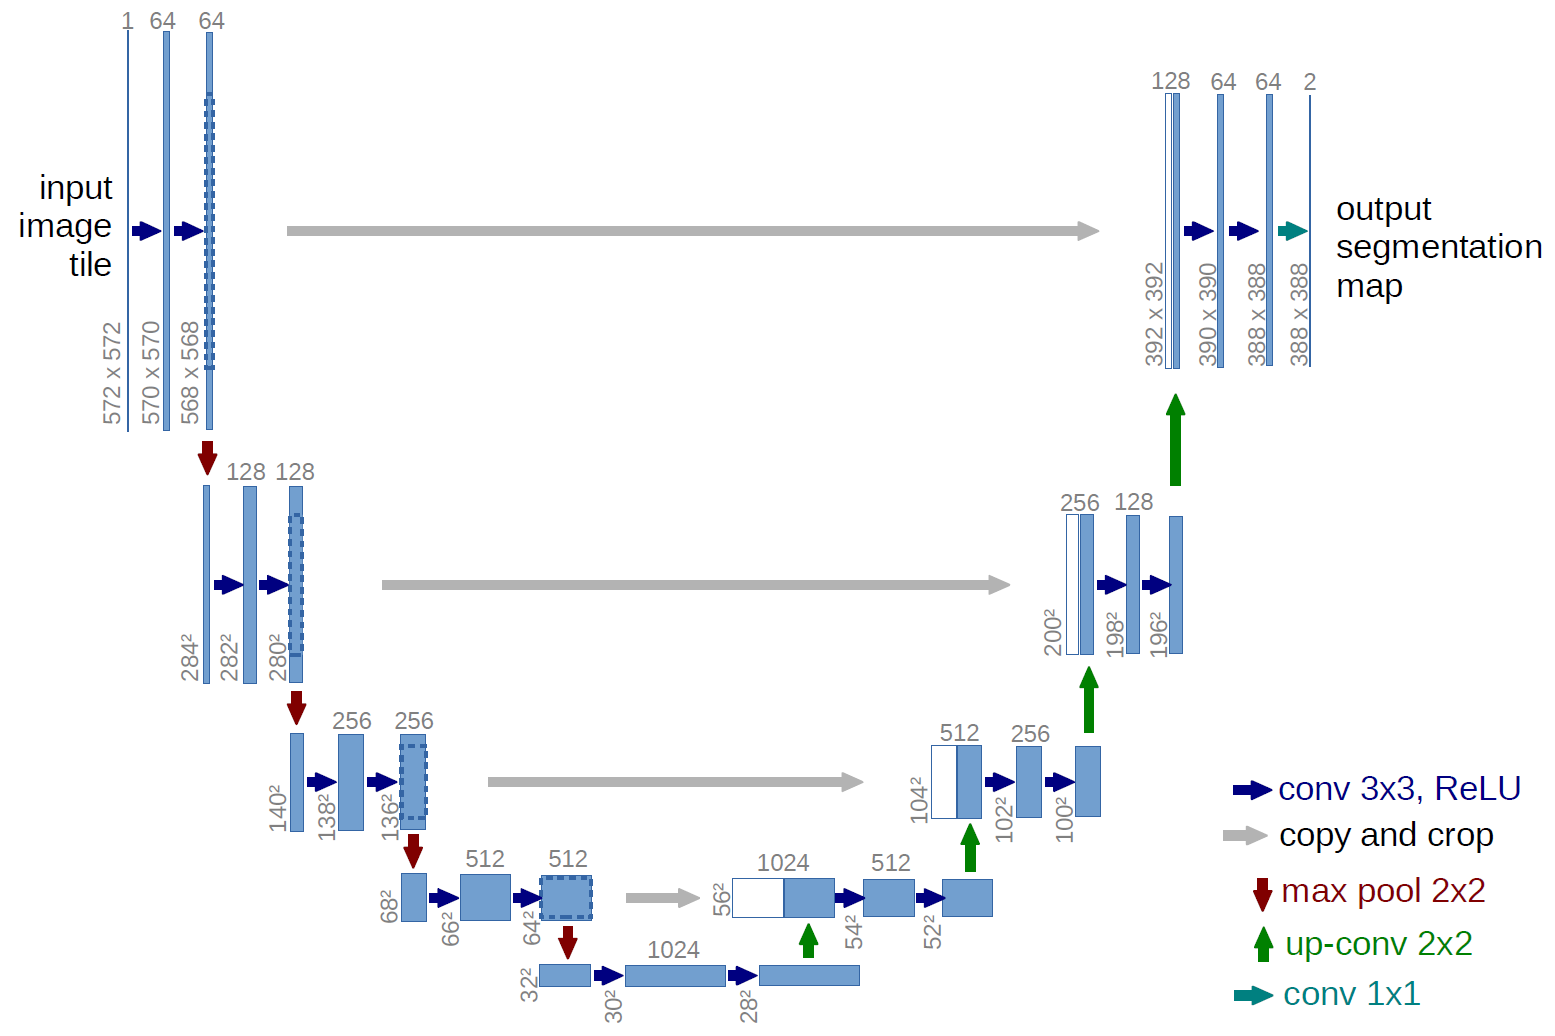

Here, training loss function is defined

In [ ]:
def show_predictions(data_generator, model):
    i_batch = randrange(len(data_generator))
    images, masks = data_generator[i_batch]
    i_image = randrange(len(images))
    img = images[i_image]
    mask = np.argmax(masks[i_image], axis=-1)
    pred_mask = np.argmax(model.predict(img[np.newaxis,...]), axis=-1)[0]
    display([img, mask , pred_mask])


class DisplayCallback(tf.keras.callbacks.Callback):
    def __init__(self, data_generator):
      self.data_generator = data_generator

    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions(self.data_generator, self.model)
        print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

class DataSequence(tf.keras.utils.Sequence):
    def __init__(self, img_gen_flow, mask_gen_flow, length):
        self.img_gen_flow = img_gen_flow
        self.mask_gen_flow = mask_gen_flow
        self.length = length
        
    def __len__(self):
        return self.length 

    def __getitem__(self, idx):
        img_batch = self.img_gen_flow[idx]
        mask_batch = self.mask_gen_flow[idx]
        return img_batch, mask_batch

def multiclass_weighted_squared_dice_loss(class_weights: Union[list, np.ndarray, tf.Tensor]) -> Callable[[tf.Tensor, tf.Tensor],
                                                                                                   tf.Tensor]:
    """
    Weighted squared Dice loss.
    Used as loss function for multi-class image segmentation with one-hot encoded masks.
    :param class_weights: Class weight coefficients (Union[list, np.ndarray, tf.Tensor], len=<N_CLASSES>)
    :return: Weighted squared Dice loss function (Callable[[tf.Tensor, tf.Tensor], tf.Tensor])
    """
    if not isinstance(class_weights, tf.Tensor):
        class_weights = tf.constant(class_weights)

    def loss(y_true: tf.Tensor, y_pred: tf.Tensor) -> tf.Tensor:
        """
        Compute weighted squared Dice loss.
        :param y_true: True masks (tf.Tensor, shape=(<BATCH_SIZE>, <IMAGE_HEIGHT>, <IMAGE_WIDTH>, <N_CLASSES>))
        :param y_pred: Predicted masks (tf.Tensor, shape=(<BATCH_SIZE>, <IMAGE_HEIGHT>, <IMAGE_WIDTH>, <N_CLASSES>))
        :return: Weighted squared Dice loss (tf.Tensor, shape=(None,))
        """
        axis_to_reduce = range(1, K.ndim(y_pred))  # Reduce all axis but first (batch)
        numerator = y_true * y_pred * class_weights  # Broadcasting
        numerator = 2. * K.sum(numerator, axis=axis_to_reduce)

        denominator = (y_true**2 + y_pred**2) * class_weights  # Broadcasting
        denominator = K.sum(denominator, axis=axis_to_reduce)

        return 1 - numerator / denominator

    return loss

    

In [ ]:
def get_segmenter_scratch(img_size, num_classes):

    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model

    

In [ ]:
# segmentation_scratch = get_segmenter_scratch((128,128), 21)


# class_weight_scratch=np.ones(21, dtype=np.float32)
# for i in range(1,21):
#     class_weight_scratch[i]=10.
# segmentation_scratch.compile(optimizer="adam", loss=multiclass_weighted_squared_dice_loss(class_weight_scratch), metrics=['categorical_accuracy'])
# callbacks = [
#     keras.callbacks.ModelCheckpoint("segmentation_scratch_best.h5", 
#                                     save_best_only=True,
#                                     monitor='val_loss',
#                                     # save_weights_only=True,
#                                    ),
#     DisplayCallback(DataSequence(img_gen_flow_validation, mask_gen_flow_validation, len(img_gen_flow_validation))) #Show a validation result on every epoch
# ]




# history = segmentation_scratch.fit(DataSequence(img_gen_flow, mask_gen_flow, len(train_df)// BATCH_SIZE),
#                     epochs = 100,
#                     validation_data=DataSequence(img_gen_flow_validation, mask_gen_flow_validation, len(img_gen_flow_validation)),
#                     callbacks = callbacks,
#                     )

                    
# segmentation_scratch.save('segmentation_scratch_final.h5') 




In [ ]:
# def show_list(display_list):
#   plt.figure(figsize=(15, 15))
#   title = ['Image', 'Ground Truth Mask', 'Predicted Mask']

#   for i in range(len(display_list)):
#     plt.subplot(1, len(display_list), i+1)
#     plt.title(title[i])
#     plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
#     plt.axis('off')
#   plt.show()

# def gen_mask(pred_mask):
#   predicted_mask = tf.math.argmax(pred_mask, axis=-1)
#   predicted_mask = predicted_mask[..., tf.newaxis]
#   return predicted_mask[0]

# prediction_list = [(1, 12), (2, 12), (3, 12), (4, 12)]
# for batch, image in prediction_list:
#     ori_image = img_gen_flow[batch][image]
#     gt_mask = mask_gen_flow[batch][image]
#     show_list([ori_image, gt_mask,
#              gen_mask(segmentation_scratch.predict(ori_image[tf.newaxis, ...]))])  

In [ ]:
class TestDataSequence(tf.keras.utils.Sequence):
    def __init__(self, img_gen_flow):
        self.img_gen_flow = img_gen_flow
        
    def __len__(self):
        return len(self.img_gen_flow) 

    def __getitem__(self, index):
        img_batch = self.img_gen_flow[index]
        return img_batch

# predicted_seg = np.empty((len(test_df), 128, 128, 21))
# i = 0
# for batch in TestDataSequence(test_img_gen_flow):
#     for batch_image in batch:
#         predicted_seg[i] =  segmentation_scratch.predict(batch_image[tf.newaxis, ...])
#         i += 1
        

In [ ]:
# def show_list_test(display_list):
#   plt.figure(figsize=(15, 15))
#   title = ['Image', 'Predicted Mask']

#   for i in range(len(display_list)):
#     plt.subplot(1, len(display_list), i+1)
#     plt.title(title[i])
#     plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
#     plt.axis('off')
#   plt.show()
# for img in TestDataSequence(test_img_gen_flow):
#     index = 1
#     print(len([img[index], gen_mask(segmentation_scratch.predict(img[index][tf.newaxis, ...]))]))
#     show_list_test([img[index], gen_mask(segmentation_scratch.predict(img[index][tf.newaxis, ...]))])

In [ ]:
# %%time
# def resize(mask_predictions):
#     reshaped_segments = []
#     for i, pred in enumerate(mask_predictions):
#         img = np.zeros((128, 128))
#         for x in range(128):
#             for y in range(128):
#                 img[x][y] = int(np.argmax(pred[x][y]))
#         width, height = test_df["img"][i].shape[0], test_df["img"][i].shape[1]
#         resized_mask = cv2.resize(img, (height, width), interpolation=cv2.INTER_CUBIC)
#         reshaped_segments.append(resized_mask)
#     return reshaped_segments
     
# test_df.loc[:, "seg"] = resize(predicted_seg)

## 3.3 Transfer Learning for Segmentation

Transfer learning can be effectively used for semantic segmentation tasks. In semantic segmentation, the goal is to assign a class label to each pixel in an image, effectively segmenting the image into different regions based on their semantic meaning. Transfer learning allows us to leverage pre-trained models trained on large datasets, such as ImageNet, and adapt them to perform semantic segmentation on our target dataset, even with limited annotated data.

In this task, we adpoted three methods of segmentation for higher accuracy. They are: MobileNetV2, DeepLabv3+ and FCN ResNet. 

### 3.3.1 MobileNetV2

MobileNetV2 is a convolutional neural network (CNN) architecture specifically designed for efficient and lightweight mobile applications. It is a successor to the original MobileNet architecture, developed by Google researchers (Sandler et al., 2018).

MobileNetV2 aims to provide a compromise between accuracy and model size, making it suitable for mobile and embedded devices with limited computational resources. The architecture employs a combination of depthwise separable convolutions and linear bottleneck layers to reduce the number of parameters and computational complexity, while still maintaining good performance.

Depthwise separable convolutions separate the standard convolution operation into two separate operations: depthwise convolution and pointwise convolution. The depthwise convolution performs a single convolutional operation on each input channel independently, and the pointwise convolution combines the outputs of the depthwise convolution with a 1x1 convolution operation. This separation significantly reduces the computational cost compared to traditional convolutions.

The linear bottleneck layers are introduced to further enhance the efficiency of the network. They reduce the dimensionality of feature maps using a 1x1 convolution, followed by a non-linear activation function, and then expand the dimensions back using another 1x1 convolution. This bottleneck structure helps to retain important features while reducing the computational load.
 
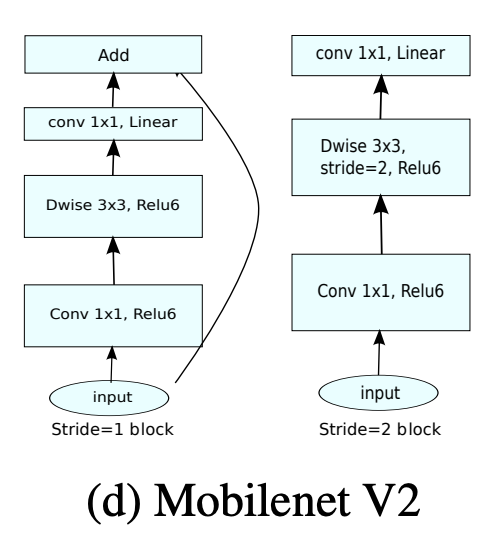




In [ ]:
# base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)
# print(base_model.summary())

In [ ]:
def mobilenet_unet(output_channels:int):
  base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)
  layer_names = [
      'block_1_expand_relu',   # 64x64
      'block_3_expand_relu',   # 32x32
      'block_6_expand_relu',   # 16x16
      'block_13_expand_relu',  # 8x8
      'block_16_project',      # 4x4
  ]
    
  base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

  down_layers = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
  down_layers.trainable = False

  up_layers = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
  ]
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])

  # Downsampling
  skip_connection = down_layers(inputs)
  x = skip_connection[-1]
  skip_connection = reversed(skip_connection[:-1])

  # Upsampling and skip connections
  for up, skip in zip(up_layers, skip_connection):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  final_layer = tf.keras.layers.Conv2DTranspose(filters=output_channels, kernel_size=3, strides=2, padding='same')  #64x64 -> 128x128
  x = final_layer(x)
  return tf.keras.Model(inputs=inputs, outputs=x)

# mobilenet_unet_seg = mobilenet_unet(output_channels=OUTPUT_CHANNELS)
# mobilenet_unet_seg.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# print(mobilenet_unet_seg.summary())

In [ ]:
# def show_list(display_list):
#   plt.figure(figsize=(15, 15))
#   title = ['Image', 'Ground Truth Mask', 'Predicted Mask']

#   for i in range(len(display_list)):
#     plt.subplot(1, len(display_list), i+1)
#     plt.title(title[i])
#     plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
#     plt.axis('off')
#   plt.show()

# def gen_mask(pred_mask):
#   predicted_mask = tf.math.argmax(pred_mask, axis=-1)
#   predicted_mask = predicted_mask[..., tf.newaxis]
#   return predicted_mask[0]

# prediction_list = [(1, 12), (2, 12), (3, 12), (4, 12)]
# for batch, image in prediction_list:
#     ori_image = img_gen_flow[batch][image]
#     gt_mask = mask_gen_flow[batch][image]
#     show_list([ori_image, gt_mask,
#              gen_mask(mobilenet_unet_seg.predict(ori_image[tf.newaxis, ...]))])

Finetune Segmentation Model

In [ ]:
# class DataSequence(tf.keras.utils.Sequence):
    
#     def __init__(self, img_gen_flow, mask_gen_flow, length):
#         self.img_gen_flow = img_gen_flow
#         self.mask_gen_flow = mask_gen_flow
#         self.length = length
        
#     def __len__(self):
#         return self.length 

#     def __getitem__(self, idx):
#         img_batch = self.img_gen_flow[idx]
#         mask_batch = self.mask_gen_flow[idx]
#         return img_batch, mask_batch

# from tensorflow import keras

# EPOCHS = 150
# MOBILENET_MODEL = f"v2mobilenet_model_epoch_150"
# MOBILENET_HISTORY_PATH = f'/kaggle/working/v2mobilenet_model_epoch_150.csv'
# MOBILENET_MODEL_PATH = f'/kaggle/working/v2mobilenet_model_epoch_150.h5'


# training_seg = False
# if training_seg:
#     print("start training...")
#     model_history = mobilenet_unet_seg.fit(DataSequence(img_gen_flow, mask_gen_flow, len(train_df)// BATCH_SIZE),
#                             epochs=EPOCHS,
#                             steps_per_epoch=STEPS_PER_EPOCH,
#                             validation_data=DataSequence(img_gen_flow_validation, mask_gen_flow_validation, len(img_gen_flow_validation)),
#                             callbacks=[
#                                         keras.callbacks.ModelCheckpoint(MOBILENET_MODEL_PATH, save_weights_only=True, save_best_only=True, mode='min'),
#                                         keras.callbacks.ReduceLROnPlateau(factor=0.2, monitor='val_loss', min_lr=1e-5, verbose=1, patience=20),
#                                         keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True),
#                                         ] )
#     print("saving model...")
#     hist_df = pd.DataFrame(model_history.history)
#     with open(MOBILENET_HISTORY_PATH, mode='w') as f:
#         hist_df.to_csv(f)
    
#     # loss
#     loss = hist_df['loss']
#     val_loss = hist_df['val_loss']
#     plt.figure()
#     plt.title('Training and Validation Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss Value')
#     plt.plot(hist_df.index, loss, 'r', label='Training loss')
#     plt.plot(hist_df.index, val_loss, 'g', label='Validation loss')
#     plt.ylim([0, 1])
#     plt.legend()
#     plt.show()

#     # acc
#     acc = hist_df['accuracy']
#     val_acc = hist_df['val_accuracy']
#     plt.figure()
#     plt.title('Training and Validation Accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy Value')
#     plt.plot(hist_df.index, acc, 'r', label='Training Accuracy')
#     plt.plot(hist_df.index, val_acc, 'g', label='Validation Accuracy')
#     plt.ylim([0, 1])
#     plt.legend()
#     plt.show()
        
        
# if training_seg == False:
#     mobilenet_unet_seg = mobilenet_unet(output_channels=OUTPUT_CHANNELS)
#     mobilenet_unet_seg.compile(optimizer='adam',
#                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#                 metrics=['accuracy'])
#     print("model is loading...")            
#     mobilenet_unet_seg.load_weights(MOBILENET_MODEL_PATH)
#     hist_df = pd.read_csv(MOBILENET_HISTORY_PATH, index_col=0)
#     print("history loaded")

Prediction on test datase

In [ ]:
# best_seg_model = mobilenet_unet(output_channels=OUTPUT_CHANNELS)
# best_seg_model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# best_seg_model.load_weights("/content/best_mobilenet_unet_model_epoch_400.h5")  

In [ ]:
# DeeplabV3_model.load_weights("/content/seg_model_deeplabv3_best.h5")
# submission_model = DeeplabV3_model

In [ ]:
# class TestDataSequence(tf.keras.utils.Sequence):
#     def __init__(self, img_gen_flow):
#         self.img_gen_flow = img_gen_flow
        
#     def __len__(self):
#         return len(self.img_gen_flow) 

#     def __getitem__(self, index):
#         img_batch = self.img_gen_flow[index]
#         return img_batch

# predicted_seg = np.empty((len(test_df), 128, 128, 21))
# i = 0
# for batch in TestDataSequence(test_img_gen_flow):
#     for batch_image in batch:
#         predicted_seg[i] =  submission_model.predict(batch_image[tf.newaxis, ...])
#         i += 1

In [ ]:
# def show_list_test(display_list):
#   plt.figure(figsize=(15, 15))
#   title = ['Image', 'Predicted Mask']

#   for i in range(len(display_list)):
#     plt.subplot(1, len(display_list), i+1)
#     plt.title(title[i])
#     plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
#     plt.axis('off')
#   plt.show()
# for img in TestDataSequence(test_img_gen_flow):
#     index = 1
#     print(len([img[index], gen_mask(submission_model.predict(img[index][tf.newaxis, ...]))]))
#     show_list_test([img[index], gen_mask(submission_model.predict(img[index][tf.newaxis, ...]))])

In [ ]:
# %%time
# def resize(mask_predictions):
#     reshaped_segments = []
#     for i, pred in enumerate(mask_predictions):
#         img = np.zeros((128, 128))
#         for x in range(128):
#             for y in range(128):
#                 img[x][y] = int(np.argmax(pred[x][y]))
#         width, height = test_df["img"][i].shape[0], test_df["img"][i].shape[1]
#         resized_mask = cv2.resize(img, (height, width), interpolation=cv2.INTER_CUBIC)
#         reshaped_segments.append(resized_mask)
#     return reshaped_segments
     
# test_df.loc[:, "seg"] = resize(predicted_seg)

### 3.3.2 DeepLabv3+

DeepLabv3+: DeepLabv3+ utilizes an encoder-decoder architecture with an Atrous Spatial Pyramid Pooling (ASPP) module for capturing multi-scale contextual information. It employs dilated convolutions to capture different scales of information without downsampling the feature maps. DeepLabv3+ focuses on capturing detailed information and achieving precise segmentation boundaries.

Compared with U-Net, DeepLabv3+ is particularly effective in capturing global context and handling large receptive fields.

The structure of DeepLabv3+ can be divided into two main components: the encoder (backbone) and the decoder. Here's an overview of the structure:

Encoder (Backbone):

The backbone network is responsible for extracting features from the input image.
Common choices for the backbone network are ResNet, Xception, or MobileNet, which are pre-trained on large-scale image classification tasks.
The backbone typically consists of several convolutional layers and down-sampling operations to capture features at different scales.
Atrous Spatial Pyramid Pooling (ASPP):

ASPP is a module used in DeepLabv3+ to capture multi-scale information and context.
ASPP applies multiple parallel convolutional layers with different atrous rates (dilated convolutions) to capture features at different receptive fields.
By using dilated convolutions, ASPP can capture contextual information at different scales without significantly increasing the computational cost.
The outputs of the parallel convolutional layers are then concatenated to form the final ASPP output.
Decoder:

The decoder part of DeepLabv3+ aims to refine the output of ASPP and generate high-resolution segmentation maps.
The decoder includes upsampling operations to increase the spatial resolution of the feature maps.
DeepLabv3+ uses skip connections to combine the low-level features from the encoder with the upsampled features from the decoder.
This fusion of features helps to preserve fine-grained details while incorporating the global contextual information captured by the ASPP module.
Finally, a pixel-wise classification layer (usually a 1x1 convolutional layer) is applied to produce the segmentation map.
Overall, DeepLabv3+ combines the advantages of dilated convolutions, multi-scale context aggregation through ASPP, and the use of skip connections to improve both the local and global context information for accurate and detailed segmentation results.

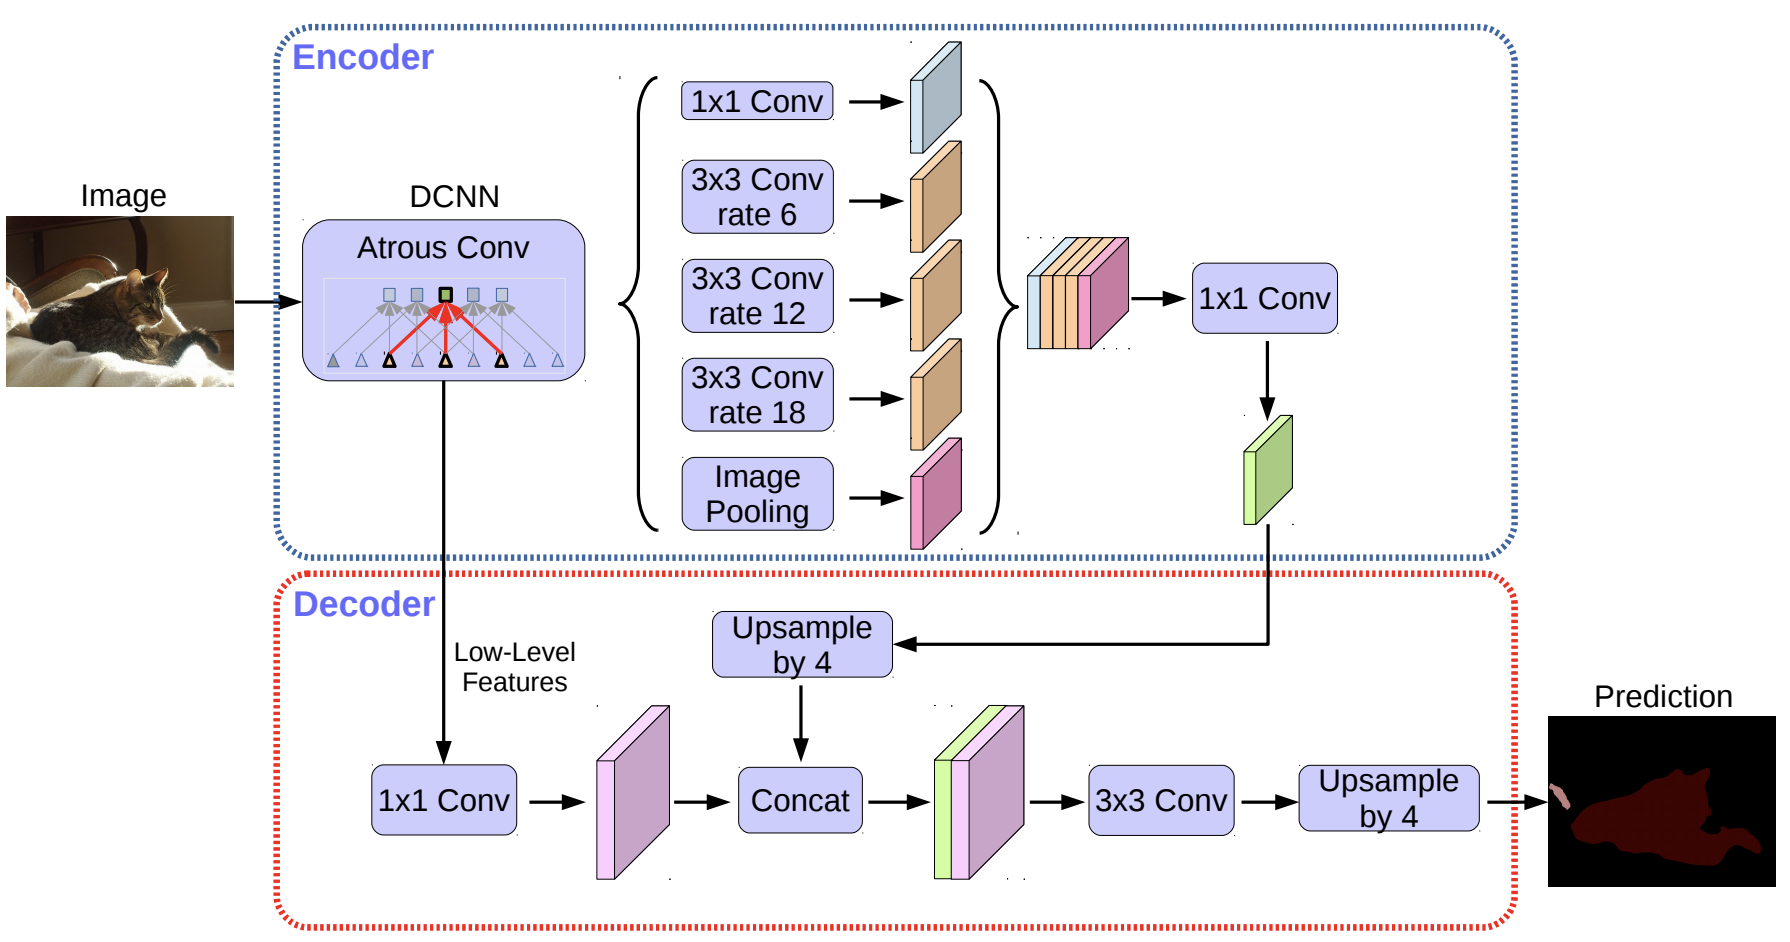

Generate train and validation dataset

In [ ]:
class DataGenerator:
    def __init__(self, data_dir, image_size, batch_size, num_train_images, num_val_images):
        self.data_dir = data_dir
        self.image_size = image_size
        self.batch_size = batch_size
        self.num_train_images = num_train_images
        self.num_val_images = num_val_images
    
    def generate_train_val_datasets(self):
        self.create_data_directories()
        self.save_images_to_directory()
        
        train_images = sorted(glob(os.path.join(self.data_dir, "x/*")))[:self.num_train_images]
        train_masks = sorted(glob(os.path.join(self.data_dir, "y/*")))[:self.num_train_images]
        val_images = sorted(glob(os.path.join(self.data_dir, "x/*")))[self.num_train_images:self.num_train_images+self.num_val_images]
        val_masks = sorted(glob(os.path.join(self.data_dir, "y/*")))[self.num_train_images:self.num_train_images+self.num_val_images]
        
        train_dataset = self.data_generator(train_images, train_masks)
        val_dataset = self.data_generator(val_images, val_masks)
        
        return train_dataset, val_dataset
    
    def create_data_directories(self):
        os.makedirs(self.data_dir, exist_ok=True)
        os.makedirs(os.path.join(self.data_dir, "x"), exist_ok=True)
        os.makedirs(os.path.join(self.data_dir, "y"), exist_ok=True)
        
    def save_images_to_directory(self):
        for i, (img, seg) in enumerate(zip(train_df["img"].to_numpy(), train_df["seg"].to_numpy())):
            x_path = os.path.join(self.data_dir, "x", f"x{i}.png")
            y_path = os.path.join(self.data_dir, "y", f"y{i}.png")
            Image.fromarray(img).save(x_path, "PNG")
            Image.fromarray(seg).save(y_path, "PNG")
            
    def read_image(self, image_path, mask=False):
        image = tf.io.read_file(image_path)
        if mask:
            image = tf.image.decode_png(image, channels=1)
            image.set_shape([None, None, 1])
            image = tf.image.resize(images=image, size=[self.image_size, self.image_size])
        else:
            image = tf.image.decode_png(image, channels=3)
            image.set_shape([None, None, 3])
            image = tf.image.resize(images=image, size=[self.image_size, self.image_size])
            image = image / 127.5 - 1
        return image
    
    def load_data(self, image_path, mask_path):
        image = self.read_image(image_path)
        mask = self.read_image(mask_path, mask=True)
        return image, mask
    
    def data_generator(self, image_list, mask_list):
        dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
        dataset = dataset.map(self.load_data, num_parallel_calls=tf.data.AUTOTUNE)
        dataset = dataset.batch(self.batch_size, drop_remainder=True)
        return dataset


In [ ]:
image_size = 224
batch_size = 4
num_classes = 21
data_dir = "./images_to_train/"
num_train_images = 675  # Change if we decide to use data augmentation
num_val_images = 74  # Change if we decide to use data augmentation

data_generator = DataGenerator(data_dir, image_size, batch_size, num_train_images, num_val_images)
train_dataset, val_dataset = data_generator.generate_train_val_datasets()

print("Train Dataset:", train_dataset)
print("Val Dataset:", val_dataset)


Build architecture for transfer learning

Once a convolutional block is built, the Dilated Spatial Pyramid Pooling module is implemented into the architeture to perform average pooling followed by multiple convolutional blocks with different dilation rates. 

Encoder part: A pre-trained MobileNet is used as the backbone network until the conv_pw_11_bn layer. The output of this layer is passed through the DilatedSpatialPyramidPooling method to incorporate multi-scale context information.

Decoder part: Two inputs are upsampled and concatenated. The first input is upsampled to match the size of the second input, which is obtained from the conv_pw_3_bn layer of the MobileNet backbone. The concatenated features are then passed through convolutional blocks and upsampled to the original image size. Finally, a 1x1 convolutional layer is applied to generate the final output, which represents the segmentation mask. 

In [ ]:
class DeeplabV3Model:
    def __init__(self, image_size, num_classes):
        self.image_size = image_size
        self.num_classes = num_classes

    def convolution_block(
        self,
        block_input,
        num_filters=256,
        kernel_size=3,
        dilation_rate=1,
        padding="same",
        use_bias=False,
    ):
        x = layers.Conv2D(
            num_filters,
            kernel_size=kernel_size,
            dilation_rate=dilation_rate,
            padding="same",
            use_bias=use_bias,
            kernel_initializer=keras.initializers.HeNormal(),
        )(block_input)
        x = layers.BatchNormalization()(x)
        return tf.nn.relu(x)
    # encoder
    def DilatedSpatialPyramidPooling(self, dspp_input): 
        dims = dspp_input.shape
        x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
        x = self.convolution_block(x, kernel_size=1, use_bias=True)
        out_pool = layers.UpSampling2D(
            size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]), interpolation="bilinear",
        )(x)

        out_1 = self.convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
        out_6 = self.convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
        out_12 = self.convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
        out_18 = self.convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

        x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
        output = self.convolution_block(x, kernel_size=1)
        return output
    
    # decoder
    def build_model(self):
        model_input = keras.Input(shape=(self.image_size, self.image_size, 3))
        mob_net = keras.applications.MobileNet(
            weights="imagenet", include_top=False, input_tensor=model_input
        )
        x = mob_net.get_layer("conv_pw_11_bn").output
        x = self.DilatedSpatialPyramidPooling(x)

        input_a = layers.UpSampling2D(
            size=(self.image_size // 4 // x.shape[1], self.image_size // 4 // x.shape[2]),
            interpolation="bilinear",
        )(x)
        input_b = mob_net.get_layer("conv_pw_3_bn").output
        input_b = self.convolution_block(input_b, num_filters=48, kernel_size=1)

        x = layers.Concatenate(axis=-1)([input_a, input_b])
        x = self.convolution_block(x)
        x = self.convolution_block(x)
        x = layers.UpSampling2D(
            size=(self.image_size // x.shape[1], self.image_size // x.shape[2]),
            interpolation="bilinear",
        )(x)
        model_output = layers.Conv2D(self.num_classes, kernel_size=(1, 1), padding="same")(x)

        model = keras.Model(inputs=model_input, outputs=model_output)
        return model




Finetune the model

In [ ]:
# Usage example
image_size = 224
num_classes = 21

deeplab_model = DeeplabV3Model(image_size, num_classes).build_model()

earlystopper = keras.callbacks.EarlyStopping(patience=10, verbose=1)
checkpointer = keras.callbacks.ModelCheckpoint(
    "seg_model_deeplabv3_save.h5",
    verbose=1,
    save_best_only=True,
)
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.000001
)

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
deeplab_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss=loss,
    metrics=["accuracy"]
)

history = deeplab_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=40,
    callbacks=[earlystopper, checkpointer, learning_rate_reduction]
)


In [ ]:
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
if train_cls == True:
    DeeplabV3_model = deeplab_model

else:
    DeeplabV3_model = DeeplabV3Model(image_size=224, num_classes=21).build_model() 
    DeeplabV3_model.load_weights("/kaggle/working/seg_model_deeplabv3_best.h5")
    

In [ ]:
def show_list(display_list):
  plt.figure(figsize=(15, 15))
  title = ['Image', 'Ground Truth Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

def gen_mask(pred_mask):
  predicted_mask = tf.math.argmax(pred_mask, axis=-1)
  predicted_mask = predicted_mask[..., tf.newaxis]
  return predicted_mask[0]

def show_list(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Image', 'Ground Truth Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

for batch, (images, masks) in enumerate(train_dataset.take(10)):
    ori_image = images[0]  # Get the first image from the batch
    gt_mask = masks[0]  # Get the corresponding mask for the first image
    show_list([ori_image, gt_mask, gen_mask(DeeplabV3_model.predict(ori_image[tf.newaxis, ...]))])

Generate prediction for test sets

In [ ]:

def resize_img(imgs, width, height, interpolation=cv2.INTER_LINEAR):
    resized_imgs = []
    for mask in imgs:
        im_resize = cv2.resize(mask, 
                               (width, height), 
                               interpolation=interpolation)
        resized_imgs.append(im_resize)
    return resized_imgs

def read_image(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.image.decode_png(image, channels=1)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[224, 224])
    else:
        image = tf.image.decode_png(image, channels=3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[224, 224])
        image = image / 127.5 - 1
    return image


!mkdir -p test_images
final_images_seg = []
for i, j in enumerate(test_df["img"].to_numpy()):
    shape = j.shape[:2][::-1]
    im_name = f"test_images/x{i}.png"
    Image.fromarray(j).save(im_name,"PNG")
    predictions = DeeplabV3_model.predict(np.expand_dims((read_image(im_name)), axis=0))
    predictions = np.squeeze(predictions)
    img_infer = np.argmax(predictions, axis=2)
    final_images_seg.append(resize_img([img_infer], *shape, interpolation=cv2.INTER_NEAREST)[0])

test_df["seg"] = final_images_seg

### 3.3.3 FCN ResNet based on PyTorch

For this image segmentation task, we need to divide the images in the VOC 2009 data set into 20 categories.In the preprocessing, the dataset class is created, which inherits from the Dataset class in the torch. The original picture is 335*500, dataset class realized the resize of the picture, so as to adapt to the input of the network. At the same time, the dimension of the original picture is RGB form H*W*C, and the neural network channel is generally in the front, so the dataset class completed the dimension change. For label_mask. Since the crossentropy() function of the new torch supports the one_hot format, the encoding of label_mask is completed during the preprocessing, and 21 classes of data are encoded. Here, the background is also classified as a class.

We use fcn network for image segmentation. fcn network is a kind of full convolutional network, which can improve the generalization ability of the model. In the decoding layer, we used the classic resnet101 network for feature extraction, and then sampled the feature map to the size of the original image. Finally, softmax was used for classification, and the category of each pixel was obtained. In order to improve the training efficiency, we use the pre-training model, which is trained on the coco data set, which can improve the generalization ability of the model. The loss function uses diceloss and focalloss mixed loss function. diceloss loss function is a measurement function used to evaluate the similarity of two samples. The larger the value is, the more similar the two samples are. focalloss is mainly used to solve the unbalanced number of positive and negative samples in one-stage target detection, and the gamma coefficient can accelerate the point penalty value of prediction probability around 0.5, so as to improve the convergence speed of the model. The training is divided into two times, the first is rough training, the learning rate is larger 5e-6, the training is carried out with large batchsize, and the weight ratio between diceloss loss function and focalloss() is 1:1, which makes the model convergence faster. The second time is precision training, the learning rate is reduced to 1e-6, the training is carried out with a smaller batchsize, and the weight ratio between diceloss loss function and 

In [ ]:
# torch.cuda.empty_cache()

Dataset preprocessing

In [ ]:



# #Pixel value normalization
# def normalize(image):
#     """
#     Normalize the image between 0 and 1.
    
#     Parameters
#     ----------
#     image: np.ndarray - image array of shape (height, width, num_channels)
    
#     Returns
#     -------
#     image: np.ndarray - normalized image array of shape (height, width, num_channels)
#     """
#     image = image.astype(np.float32)
#     return (image - np.min(image)) / (np.max(image) - np.min(image))




# #  one-hot encode the mask
# def one_hot_encode(mask, num_classes):
#     """
#     One-hot encode the mask.
    
#     Parameters
#     ----------
#     mask: np.ndarray - mask array of shape (height, width)
#     num_classes: int - number of classes
    
#     Returns
#     -------
#     one_hot: np.ndarray - one-hot encoded mask of shape (num_classes, height, width)
#     """
#     one_hot = np.zeros((num_classes, mask.shape[0], mask.shape[1]), dtype=np.int8)
#     for c in range(num_classes):
#         one_hot[c, :, :] = mask == c 
#     return np.array(one_hot)

# #  one-hot decode the mask
# def one_hot_decode(one_hot,torch_flag  = 0):
#     """
#     Decode the one-hot encoded mask.
    
#     Parameters
#     ----------
#     one_hot: np.ndarray - one-hot encoded mask of shape (num_classes, height, width)
    
#     Returns
#     -------
#     mask: np.ndarray - mask array of shape (height, width)
#     """
#     if torch_flag:
#         return torch.argmax(one_hot, dim=0) 
#     return np.argmax(one_hot, axis=0) 

# class dataset(Dataset):
#     def __init__(self, images, segmentation_masks=None, img_size = None , batch_size=None, data_augmentation=False, shuffle=False,mask_encode = False):
#         self.images = images/255.0
#         self.segmentation_masks = segmentation_masks
#         self.batch_size = batch_size
#         self.data_augmentation = data_augmentation
#         self.shuffle = shuffle
#         self.train = (segmentation_masks is not None) # True if we are in training mode
#         self.img_size = img_size
#         self.mask_encode = mask_encode        
    
#     def __len__(self): 
#         'Get length of the data loader in number of batches'
#         return  len(self.images)
#     def __getitem__(self, index):
#         if self.train:
#             if self.img_size != None:
#                 Image = cv2.resize(self.images[index], (self.img_size[0], self.img_size[1]))
#                 Mask =  cv2.resize(self.segmentation_masks[index], (self.img_size[0], self.img_size[1]), interpolation=cv2.INTER_NEAREST).astype(np.int64)
#             else:
#                 Image = self.images[index]
#                 Mask = self.segmentation_masks[index]
#         else: 
#             if self.img_size != None:
#                 Image = cv2.resize(self.images[index], (self.img_size[0], self.img_size[1]), interpolation=cv2.INTER_NEAREST)
#                 Mask = np.zeros(Image.shape)
#             else:
#                 Image = self.images[index]
#                 Mask = np.zeros(Image.shape)
#         #Transform dimension
#         Image = Image.transpose(2,0,1).astype(np.float32)
#         #one-hot coding
#         if self.mask_encode:
#             Mask = one_hot_encode(Mask, num_classes)
#             Mask = Mask.astype(np.float32)   
#         else :
#             Mask = Mask.astype(np.int64)

#         return Image,Mask # if test set, we do not have any segmentation mask, so we replace it by an array of -1



# # Loading the training data
# train_df = pd.read_csv('/kaggle/input/kul-h02a5a-computer-vision-ga2-2023/train/train_set.csv', index_col="Id")
# labels = train_df.columns
# train_df["img"] = [np.load('/kaggle/input/kul-h02a5a-computer-vision-ga2-2023/train/img/train_{}.npy'.format(idx)) for idx, _ in train_df.iterrows()]
# train_df["seg"] = [np.load('/kaggle/input/kul-h02a5a-computer-vision-ga2-2023/train/seg/train_{}.npy'.format(idx)) for idx, _ in train_df.iterrows()]
# print("The training set contains {} examples.".format(len(train_df)))
# # The training set contains 749 examples

Parameter and loss function definition

In [ ]:
# torch.cuda.set_device(0)
# seg_model = models.segmentation.fcn_resnet101(pretrained = True,num_classes=21)
# #seg_model = models.segmentation.fcn_resnet101(pretrained_backbone = True)

# #seg_model = models.segmentation.deeplabv3_resnet101(pretrained=True,num_classes=21)
# #seg_model.eval()
# num_epochs = 12
# learning_rate = 5e-6
# weight_decay = 5e-3
# momentum = 0.95
# batch_size = 2
# num_classes = 21
# save_path = './model.pth'
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# #training proces
# model = seg_model.to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate )


# train_loader = dataset(train_df['img'].values,
#                           train_df['seg'].values,
#                          img_size = (2*128,2*128),
#                           batch_size=batch_size,
#                         data_augmentation=False, shuffle=True,mask_encode = True)
                        
# train_loader = DataLoader(train_loader,batch_size=batch_size,shuffle=True,drop_last = True)


# def dice_loss(input, target,smooth = 0.01):
#       #soft_max = nn.Softmax(dim=1)
#       iflat =  nn.Softmax(dim=1)(input).view(-1)
#       smooth = 1.
#       #iflat = input.view(-1)
#       tflat = target.view(-1)
#       intersection = (iflat * tflat).sum()
#       return 1 - ((2. * intersection + smooth) /
#                 (iflat.sum() + tflat.sum() + smooth))
# class FocalLoss(nn.Module):
#       def __init__(self, gamma=2, eps=1e-7):
#             super(FocalLoss, self).__init__()
#             self.gamma = gamma
#             #self.    = eps
#             self.ce = nn.CrossEntropyLoss( reduction='none')
            
#       def forward(self, input, target):
#             logp = self.ce(input, target)
#             p = torch.exp(-logp)
#             loss = (1 - p) ** self.gamma * logp
#             #print(loss.shape,loss.item())
#             return loss.mean()

# criterion = dice_loss
# criterion2 = FocalLoss()

Train

In [ ]:
# for epoch in range(1):
#       model.train()
#       #with torch.grad():
#       loss_temp = []
#       for i, (images, masks) in enumerate(train_loader):
#             images = images.to(device)
#             masks = masks.to(device)
#             # Forward propagation
#             outputs = model(images)['out']
#             #print(outputs['out'].shape)
#             loss =  0.5 * criterion(outputs, masks) +0.5*criterion2(outputs, masks)
#             #print(loss.shape,loss.item())
#             # Back propagation and optimization
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()
#             loss_temp.append(loss.item())
#             if (i+1) % 20 == 0:
#                   print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, i+1, len(train_loader), np.mean(loss_temp)))
#                   loss_temp = []                 
#                   # Save the picture
#                   index = random.randint(0, len(images)-1)
#                   img = images[index].permute(1,2,0).cpu().numpy()#.astype(np.uint8)
#                   mask = masks[index].cpu().numpy().astype(np.uint8)
#                   mask = one_hot_decode(mask)
#                   #To predict the result, softmax was used first to change the probability value to 0-1
#                   #pred = (pred.detach().cpu().numpy() +0.5  ).astype(np.uint8)
#                   pred = outputs[index].detach().cpu().numpy()
#                   pred = one_hot_decode(pred)
#                   plt.subplot(131)
#                   #Displays images in the 0-1 pixel format
#                   plt.imshow(img)
#                   plt.subplot(132)
#                   plt.imshow(mask)
#                   plt.subplot(133)
#                   plt.imshow(pred)
#                   plt.show()
# for epoch in range(6):
#       model.train()
#       loss_temp = []
#       for i, (images, masks) in enumerate(train_loader):
#             images = images.to(device)
#             masks = masks.to(device)
#             # Forward propagation
#             outputs = model(images)['out']

#             loss =  0.85*criterion(outputs, masks) +0.15*criterion2(outputs, masks)
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()
#             loss_temp.append(loss.item())
#             if (i+1) % 20 == 0:
#                   print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
#                   .format(epoch+1, num_epochs, i+1, len(train_loader), np.mean(loss_temp)))
#                   loss_temp = []
#             if (i+1) % 20 == 0:
#                   # Save the picture
#                   index = random.randint(0, len(images)-1)
#                   img = images[index].permute(1,2,0).cpu().numpy()#.astype(np.uint8)
#                   mask = masks[index].cpu().numpy().astype(np.uint8)
#                   mask = one_hot_decode(mask)
#                   # To predict the result, softmax was used first to change the probability value to 0-1
#                   #pred = (pred.detach().cpu().numpy() +0.5  ).astype(np.uint8)
#                   pred = outputs[index].detach().cpu().numpy()
#                   pred = one_hot_decode(pred)
#                   plt.subplot(131)
#                   # Displays images in the 0-1 pixel format
#                   plt.imshow(img)
#                   plt.subplot(132)
#                   plt.imshow(mask)
#                   plt.subplot(133)
#                   plt.imshow(pred)
#                   plt.show()

In [ ]:
# for epoch in range(1):
#       model.train()
#       #with torch.grad():
#       loss_temp = []
#       for i, (images, masks) in enumerate(train_loader):
#             images = images.to(device)
#             masks = masks.to(device)
#             # Forward propagation
#             outputs = model(images)['out']
#             #print(outputs['out'].shape)
#             loss =  0.5 * criterion(outputs, masks) +0.5*criterion2(outputs, masks)
#             #print(loss.shape,loss.item())
#             # Back propagation and optimization
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()
#             loss_temp.append(loss.item())
#             if (i+1) % 20 == 0:
#                   print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, i+1, len(train_loader), np.mean(loss_temp)))
#                   loss_temp = []                 
#                   # Save the picture
#                   index = random.randint(0, len(images)-1)
#                   img = images[index].permute(1,2,0).cpu().numpy()#.astype(np.uint8)
#                   mask = masks[index].cpu().numpy().astype(np.uint8)
#                   mask = one_hot_decode(mask)
#                   #To predict the result, softmax was used first to change the probability value to 0-1
#                   #pred = (pred.detach().cpu().numpy() +0.5  ).astype(np.uint8)
#                   pred = outputs[index].detach().cpu().numpy()
#                   pred = one_hot_decode(pred)
#                   plt.subplot(131)
#                   #Displays images in the 0-1 pixel format
#                   plt.imshow(img)
#                   plt.subplot(132)
#                   plt.imshow(mask)
#                   plt.subplot(133)
#                   plt.imshow(pred)
#                   plt.show()
# for epoch in range(6):
#       model.train()
#       loss_temp = []
#       for i, (images, masks) in enumerate(train_loader):
#             images = images.to(device)
#             masks = masks.to(device)
#             # Forward propagation
#             outputs = model(images)['out']

#             loss =  0.85*criterion(outputs, masks) +0.15*criterion2(outputs, masks)
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()
#             loss_temp.append(loss.item())
#             if (i+1) % 20 == 0:
#                   print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
#                   .format(epoch+1, num_epochs, i+1, len(train_loader), np.mean(loss_temp)))
#                   loss_temp = []
#             if (i+1) % 20 == 0:
#                   # Save the picture
#                   index = random.randint(0, len(images)-1)
#                   img = images[index].permute(1,2,0).cpu().numpy()#.astype(np.uint8)
#                   mask = masks[index].cpu().numpy().astype(np.uint8)
#                   mask = one_hot_decode(mask)
#                   # To predict the result, softmax was used first to change the probability value to 0-1
#                   #pred = (pred.detach().cpu().numpy() +0.5  ).astype(np.uint8)
#                   pred = outputs[index].detach().cpu().numpy()
#                   pred = one_hot_decode(pred)
#                   plt.subplot(131)
#                   # Displays images in the 0-1 pixel format
#                   plt.imshow(img)
#                   plt.subplot(132)
#                   plt.imshow(mask)
#                   plt.subplot(133)
#                   plt.imshow(pred)
#                   plt.show()

Predict and output the result

In [ ]:
# torch.save(model.state_dict(), 'model.pth')
# # The Kernel crashed while executing code in the the current cell or a previous cell. Please review the code in the cell(s) to identify a possible cause of the failure. Click <a href='https://aka.ms/vscodeJupyterKernelCrash'>here</a> for more info. View Jupyter <a href='command:jupyter.viewOutput'>log</a> for further details.

In [ ]:
# model.eval()

# test_df = pd.read_csv('test/test_set.csv', index_col="Id")
# test_df["img"] = [np.load('test/img/test_{}.npy'.format(idx)) for idx, _ in test_df.iterrows()]
# test_df["seg"] = [-1 * np.ones(img.shape[:2], dtype=np.int8) for img in test_df["img"]]
# mark_size = test_df["seg"][0].shape
# print("The test set contains {} examples.".format(len(test_df)))
# test_loader = dataset(test_df['img'].values, img_size = (3*128,3*128),batch_size=1,mask_encode = False)
# test_loader = DataLoader(test_loader,batch_size=1,shuffle=False) 
# model.eval()
# result = []
# with torch.no_grad():
#       for i, (images, _) in enumerate(test_loader):
#             images = images.to(device)
#             outputs = model(images)['out']
#             pred = outputs[0].detach().cpu().numpy()
#             pred = one_hot_decode(pred)
#             pred =  cv2.resize(pred, (mark_size[1], mark_size[0]), interpolation=cv2.INTER_NEAREST)
#             result.append(pred)
# test_df.loc[:, "seg"] = result



# 4 Submit to competition

In [ ]:
generate_submission(test_df)

# 5 Adversarial attack
For this part, our goal is to fool classification and/or segmentation
CNN, using an adversarial attack. More specifically, the goal is build a CNN to perturb test images in a way that (i) they look unperturbed to humans; but (ii) the CNN classifies/segments these images in line with the perturbations.

Fsgm is a white box algorithm that adds perturbations based on gradient information.When we understand the simple dp network structure, when seeking the minimum value of the loss function, we will move in the opposite direction of the gradient and use the minus sign, which is the so-called gradient descent algorithm; and FGSM can be understood as a gradient ascending algorithm, also It is to use the plus sign to maximize the loss function.Taking the classic two-category problem as an example, the machine learning model learns a segmentation plane by training on samples. Points on one side of the segmentation plane are recognized as category 1, and points on the other side of the segmentation plane are identified as category 1. identified as category two. When generating an attack sample, we use a certain algorithm to calculate a change amount for the specified sample. After the sample is modified, it cannot be recognized from the human senses, but it can make the sample cross the segmentation plane, resulting in the judgment of the machine learning model. The result changes.The advantage of FGSM is that it only needs one iteration to generate adversarial samples, and can generate adversarial samples with any L∞ norm distance by controlling the parameter ε; the disadvantage is that the disturbance itself is not strong in anti-interference ability and is easily affected by other noises; in addition, The model loss function is not completely linear with the model input, which means that the perturbation of the adversarial samples generated by the algorithm is not the optimal perturbation.

In this experiment, we used fsgm algorithm to perturb the image, making the model classify the disturbed image incorrectly. In the experiment, the fourth picture is the image after adding disturbance, and the fifth picture is the segmented image. It can be seen that after adding disturbance, the image has no obvious changes in vision, but the model has a great impact on the segmentation results of the image, many categories can not be identified, some categories are identified as other categories, fsgm algorithm has a great impact on the model.Subsequently, we can train the images produced by fsgm to achieve the purpose of data enhancement, so that the model has a certain robustness to the attack of fsgm algorithm.

In [ ]:



#Pixel value normalization
def normalize(image):
    """
    Normalize the image between 0 and 1.
    
    Parameters
    ----------
    image: np.ndarray - image array of shape (height, width, num_channels)
    
    Returns
    -------
    image: np.ndarray - normalized image array of shape (height, width, num_channels)
    """
    image = image.astype(np.float32)
    return (image - np.min(image)) / (np.max(image) - np.min(image))




#  one-hot encode the mask
def one_hot_encode(mask, num_classes):
    """
    One-hot encode the mask.
    
    Parameters
    ----------
    mask: np.ndarray - mask array of shape (height, width)
    num_classes: int - number of classes
    
    Returns
    -------
    one_hot: np.ndarray - one-hot encoded mask of shape (num_classes, height, width)
    """
    one_hot = np.zeros((num_classes, mask.shape[0], mask.shape[1]), dtype=np.int8)
    for c in range(num_classes):
        one_hot[c, :, :] = mask == c 
    return np.array(one_hot)

#  one-hot decode the mask
def one_hot_decode(one_hot,torch_flag  = 0):
    """
    Decode the one-hot encoded mask.
    
    Parameters
    ----------
    one_hot: np.ndarray - one-hot encoded mask of shape (num_classes, height, width)
    
    Returns
    -------
    mask: np.ndarray - mask array of shape (height, width)
    """
    if torch_flag:
        return torch.argmax(one_hot, dim=0) 
    return np.argmax(one_hot, axis=0) 

class dataset(Dataset):
    def __init__(self, images, segmentation_masks=None, img_size = None , batch_size=None, data_augmentation=False, shuffle=False,mask_encode = False):
        self.images = images/255.0
        self.segmentation_masks = segmentation_masks
        self.batch_size = batch_size
        self.data_augmentation = data_augmentation
        self.shuffle = shuffle
        self.train = (segmentation_masks is not None) # True if we are in training mode
        self.img_size = img_size
        self.mask_encode = mask_encode        
    
    def __len__(self): 
        'Get length of the data loader in number of batches'
        return  len(self.images)
    def __getitem__(self, index):
        if self.train:
            if self.img_size != None:
                Image = cv2.resize(self.images[index], (self.img_size[0], self.img_size[1]))
                Mask =  cv2.resize(self.segmentation_masks[index], (self.img_size[0], self.img_size[1]), interpolation=cv2.INTER_NEAREST).astype(np.int64)
            else:
                Image = self.images[index]
                Mask = self.segmentation_masks[index]
        else: 
            if self.img_size != None:
                Image = cv2.resize(self.images[index], (self.img_size[0], self.img_size[1]), interpolation=cv2.INTER_NEAREST)
                Mask = np.zeros(Image.shape)
            else:
                Image = self.images[index]
                Mask = np.zeros(Image.shape)
        #Transform dimension
        Image = Image.transpose(2,0,1).astype(np.float32)
        #one-hot coding
        if self.mask_encode:
            Mask = one_hot_encode(Mask, num_classes)
            Mask = Mask.astype(np.float32)   
        else :
            Mask = Mask.astype(np.int64)

        return Image,Mask # if test set, we do not have any segmentation mask, so we replace it by an array of -1





In [ ]:



def dice_loss(input, target,smooth = 0.01):
      #soft_max = nn.Softmax(dim=1)
      iflat =  nn.Softmax(dim=1)(input).view(-1)
      smooth = 1.
      #iflat = input.view(-1)
      tflat = target.view(-1)
      intersection = (iflat * tflat).sum()
      return 1 - ((2. * intersection + smooth) /
                (iflat.sum() + tflat.sum() + smooth))
class FocalLoss(nn.Module):
      def __init__(self, gamma=2, eps=1e-7):
            super(FocalLoss, self).__init__()
            self.gamma = gamma
            #self.    = eps
            self.ce = nn.CrossEntropyLoss( reduction='none')
            
      def forward(self, input, target):
            logp = self.ce(input, target)
            p = torch.exp(-logp)
            loss = (1 - p) ** self.gamma * logp
            #print(loss.shape,loss.item())
            return loss.mean()



In [ ]:
torch.cuda.set_device(0)
def fgsm_attack(image, epsilon, data_grad):
        # Using the sign function, symbolize the gradient of the partial derivative with respect to x (positive 1, zero 0, negative -1)
    sign_data_grad = data_grad.sign()
    perturbed_image = image + epsilon * sign_data_grad
        # The noise is getting louder and harder for machines to recognize, but the human eye can see the difference
        # Do a clipping job to change torch.clamp values greater than 1 to 1 and values less than 0 to 0 to prevent the image from crossing the line
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
        # Return counter sample
    return perturbed_image


def ad_attack(iteration):
    for epoch in range(iteration):
        loss_temp = []
        loss_temp2 = []
        for i, (images, masks) in enumerate(train_loader):
            model.train()
            images = images.to(device)
            masks = masks.to(device)
            images.requires_grad = True  
            # forward pass
            outputs = model(images)['out']
            loss =  0.90*criterion(outputs, masks) +0.1*criterion2(outputs, masks)
            optimizer.zero_grad()
            loss.backward()
            # Collect the gradient of the data
            data_grad = images.grad.data
            # Generate counter samples
            perturbed_data = fgsm_attack(images, eps, data_grad)
            # forward pass
            outputs2 = model(perturbed_data)['out']
            loss2 =  0.90*criterion(outputs2, masks) +0.1*criterion2(outputs2, masks)
            loss_temp.append(loss.item())
            loss_temp2.append(loss2.item())
            if (i+1) % 100 == 0:
                    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                    .format(epoch+1, num_epochs, i+1, len(train_loader), np.mean(loss_temp)))
                    loss_temp = []
                    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                    .format(epoch+1, num_epochs, i+1, len(train_loader), np.mean(loss_temp2)))
                    loss_temp2 = []
            if (i+1) % 100 == 0:
                    # Display the picture after the fsgm attack
                    index = random.randint(0, len(images.detach())-1)
                    img = images[index].permute(1,2,0).cpu().detach().numpy()#.astype(np.uint8)
                    mask = masks[index].cpu().numpy().astype(np.uint8)
                    mask = one_hot_decode(mask)
                    pred = outputs[index].detach().cpu().numpy()
                    pred = one_hot_decode(pred)

                    pred2 = outputs2[index].detach().cpu().numpy()
                    pred2 = one_hot_decode(pred2)
                    plt.subplot(151)
                    plt.imshow(img)
                    plt.subplot(152)
                    plt.imshow(mask)
                    plt.subplot(153)
                    plt.imshow(pred)
                    plt.subplot(154)
                    # Displays the picture after the fsgm attack
                    plt.imshow(perturbed_data[index].permute(1,2,0).cpu().detach().numpy())
                    plt.subplot(155)
                    # Display the picture after the fsgm attack
                    plt.imshow(pred2)
                    plt.show()
# As the number of epochs increases, the number of updates to the weights in the neural network also increases, and the model changes from underfitting to overfitting. When the Loss of the model no longer continues to decrease and the accuracy no longer improves, the training can be stopped.  
# Therefore, only one epoch is selected for training in this task. 



To run the whole notebook including classification, segmentation and adversarial attack takes around 20 GB of GPU memory, exceeding the upper limit of Kaggle's GPU memory which is 15.9 GB max. The first two tasks takes up 15.7 GB, therefore, making the third task unable to run. To solve this problem, we firstly runned the whole tasks in the colab whose GPU has higher memory, and the codes run properly. When we run codes in Kaggle platform, we runned the first two tasks and the third task seperately. Here is an output of the adversarial attack in this markdown. If you would like to run yourself, you can uncomment all codes in the following cell.




![adversarial attack.png](https://drive.google.com/uc?id=1Cuq57j8CLfiu9HeyNGpN2HJSgDr2GGcr)



In [ ]:
# # Loading the training data
# train_df = pd.read_csv('/kaggle/input/kul-h02a5a-computer-vision-ga2-2023/train/train_set.csv', index_col="Id")
# labels = train_df.columns
# train_df["img"] = [np.load('/kaggle/input/kul-h02a5a-computer-vision-ga2-2023/train/img/train_{}.npy'.format(idx)) for idx, _ in train_df.iterrows()]
# train_df["seg"] = [np.load('/kaggle/input/kul-h02a5a-computer-vision-ga2-2023/train/seg/train_{}.npy'.format(idx)) for idx, _ in train_df.iterrows()]
# print("The training set contains {} examples.".format(len(train_df)))
# # The training set contains 749 examples

# torch.cuda.set_device(0)
# seg_model = models.segmentation.fcn_resnet101(pretrained = True,num_classes=21)
# #seg_model = models.segmentation.fcn_resnet101(pretrained_backbone = True)

# #seg_model = models.segmentation.deeplabv3_resnet101(pretrained=True,num_classes=21)
# #seg_model.eval()
# num_epochs = 12
# learning_rate = 5e-6
# weight_decay = 5e-3
# momentum = 0.95
# batch_size = 2
# num_classes = 21
# save_path = './model.pth'
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# #training proces
# model = seg_model.to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate )


# train_loader = dataset(train_df['img'].values,
#                           train_df['seg'].values,
#                          img_size = (2*128,2*128),
#                           batch_size=batch_size,
#                         data_augmentation=False, shuffle=True,mask_encode = True)
                        
# train_loader = DataLoader(train_loader,batch_size=batch_size,shuffle=True,drop_last = True)

# criterion = dice_loss
# criterion2 = FocalLoss()


# eps = 0.1
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# # read the model and load the parameters
# model =  models.segmentation.fcn_resnet101( num_classes=21,pretrained=True).to(device)
# #model.load_state_dict(torch.load('model.pth'))
# ad_attack(1) 

# 6 Conclusions



## 6.1 Discussions

In this project, three tasks are conducted, namely image label classification, image semantic segmentation and adversarial attack. 

In the task of image classification, CNN with ResNet is trained from scratch shows much worse performance than employing pre-trained network.To train a CNN from scratch needs large amount of dataset, while the existing one is quite small, which is prone to overfitting. Among all transfer-leanring methods, our investigation shows that NASNetLarge has the best performance. 

In the task of semantic segmentation, UNet is used for training from scratch. Furthermore, we conducted experiments involving diverse pre-trained encoders, including MobileNetV2 and DeepLabv3+. Initially, we kept the pre-trained models frozen while allowing the customized decoder to be fully trained. Following an adequate number of epochs, we proceeded to fine-tune the encoders to enhance their performance. The outcomes obtained with the pre-trained encoder surpassed those achieved with the U-Net architecture built from scratch, demonstrating significantly improved results.

In the task of adversarial attack, the FGSM algorithm is used for classification and segmentation, which perturbs test images to appear unchanged to humans but misclassify/segment them. FGSM is a gradient-based method that modifies samples to cross the decision boundary. In the experiment, perturbed images showed no visible changes but significantly affected the model's segmentation results, misidentifying categories. The FGSM algorithm has limitations in robustness and optimality of perturbations. Training on FGSM-generated images aimed to enhance model robustness against the attack.

## 6.2 Future works

**Incorporate attention archtecture**

Previous studies have show a promising direction by incoporating attention mechanisms in image classification models. For instance, Zhang et al.(2020) introduced the Split-Attention (Split-Attention Unit) mechanism, which divides and attends to different parts of the input feature maps, leading to improved performance. 


# 7 References

Cai, H., Gan, C., & Han, S. (2019). ProxylessNAS: Direct Neural Architecture Search on Target Task and Hardware. Retrieved from https://arxiv.org/abs/1812.00332

Chen, Y., Li, J., Xiao, H., Jin, X., Yan, S., & Feng, J. (2017). Dual Path Networks. In Proceedings of the Advances in Neural Information Processing Systems (NeurIPS).

Chen L C, Zhu Y, Papandreou G, et al. Encoder-decoder with atrous separable convolution for semantic image segmentation[C]//Proceedings of the European conference on computer vision (ECCV). 2018: 801-818.

He, T., Zhang, Z., Zhang, H., Zhang, Z., Xie, J., & Li, M. (2019). Bag of Tricks for Image Classification with Convolutional Neural Networks. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2019.

Howard, A. G., Zhu, M., Chen, B., Kalenichenko, D., Wang, W., Weyand, T., Andreetto, M., & Adam, H. (2017). MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications. Retrieved from https://arxiv.org/abs/1704.04861

Howard, A., Sandler, M., Chu, G., Chen, L. C., Chen, B., Tan, M., Wang, W., Zhu, Y., Pang, R., Vasudevan, V., & Le, Q. (2019). MobileNetV3: Searching for MobileNetV3. Retrieved from https://arxiv.org/abs/1905.02244

Peng, H., Zhao, Z., Zhang, S., Zhang, Y., Bai, Y., & Ji, R. (2020). Fixing the Train-Test Resolution Discrepancy. Retrieved from https://arxiv.org/abs/1906.06423

Ronneberger O, Fischer P, Brox T. U-net: Convolutional networks for biomedical image segmentation[C]//Medical Image Computing and Computer-Assisted Intervention–MICCAI 2015: 18th International Conference, Munich, Germany, October 5-9, 2015, Proceedings, Part III 18. Springer International Publishing, 2015: 234-241.

Sandler, M., Howard, A. G., Zhu, M., Zhmoginov, A., & Chen, L. C. (2018). MobileNetV2: Inverted Residuals and Linear Bottlenecks. Retrieved from https://arxiv.org/abs/1801.04381

Tan, M., & Le, Q. V. (2019). EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks. Retrieved from https://arxiv.org/abs/1905.11946

Tan, M., & Le, Q. V. (2021). EfficientNetV2: Smaller Models and Faster Training. Retrieved from https://arxiv.org/abs/2104.00298

Wang, J., Yu, H., Qi, F., Cai, Y., Yao, Y., Zhang, D., & Zhou, F. (2021). Evolutionary Neural Architecture Search for Medical Image Classification. Retrieved from https://arxiv.org/abs/2105.06379

Woo, S., Park, J., Lee, J., & Kweon, I. S. (2018). CBAM: Convolutional Block Attention Module. In Proceedings of the European Conference on Computer Vision (ECCV).

Zhang, H., Wu, C., Zhang, Z., Zhu, Y., Lin, H., Zhang, Z., ... & Smola, A. (2022). Resnest: Split-attention networks. In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (pp. 2736-2746).

Zoph, B., Vasudevan, V., Shlens, J., & Le, Q. V. (2018). Learning Transferable Architectures for Scalable Image Recognition. Retrieved from https://arxiv.org/abs/1707.07012